In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import time
import datetime
import geocoder
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',50)
pd.set_option('max_colwidth',200)
%matplotlib inline
import requests
import json
import urllib
from urllib.request import urlopen

def getGeoForAddress(address):
    add = urllib.parse.quote(address)
    addressUrl = "https://maps.googleapis.com/maps/api/geocode/json?address=" + add + '&key='
    res = requests.get(addressUrl)
    js = json.loads(res.text)
    if js.get('results'):
        lat = js.get('results')[0]['geometry']['location']['lat']
        lng = js.get('results')[0]['geometry']['location']['lng']
    else:
        lat = ''
        lng = ''
    return [lat, lng]
def ngram(text, n=3, pad=True):
    text = text.strip()
    if pad:
        text = " %s " % text
    return set([text[i:i+n] for i in range(len(text)-n+1)])
    
def create_ngram(text1, text2, n=3, pad=True):
    return ngram(text1, n=n, pad=pad), ngram(text2, n=n, pad=pad)

def tversky_index(text1, text2, a=None, b=None, q=3, pad=True):
    text1, text2 = create_ngram(text1, text2, n=q, pad=pad)
    agree_tot = len(text1.intersection(text2))
    v1 = len(text1) - agree_tot
    v2 = len(text2) - agree_tot
    
    if a != None and b != None:
        a = a/float(a+b)
        b = b/float(a+b)
    elif a <= 1.0 and a >= 0.0:
        b = 1-a
    elif b <= 1.0 and b >= 0.0:
        a = 1-b
    else:
        a = 0.5
        b = 0.5        
    return float(agree_tot)/(agree_tot+a*v1+b*v2)
# incoPat為申請人list
def fuzzy(incoPat,indus):
    corptype = ['有限','公司','责任','集团','股份','控股']
    text1 = incoPat
    text2 = indus
    incoPat_nor = []   
    for text in text1:
        for i in corptype:
            if i in text:
                text = re.sub(i,'',text)
        incoPat_nor.append(text)
    for i in corptype:
        if i in text2:
            text2 = re.sub(i,'',text2)
    similar = []
    for text in incoPat_nor:
        dice = tversky_index(text,text2, a=0.5, q=min(2,len(text),len(text2)), pad=False)
        if dice>0.7:
            similar.append([incoPat[incoPat_nor.index(text)],dice])
        else:
            pass
    if len(similar)>0:
        return similar[[k[1] for k in similar].index(max([i[1] for i in similar]))][0]
    else:
        return indus
city_code = pd.read_excel('C:/Users/user/Dropbox/paper/科技園區/China/省地縣碼對照.xls')
city_code = city_code[~city_code['代碼'].isnull()].drop(['标注','说明'],axis=1)
city_code['代碼_str'] = city_code['代碼'].apply(lambda x:str(int(x)))
city_code = city_code.drop('代碼',axis=1)

# 廣東Incopat資料整合

In [2]:
df1 = pd.read_excel(r'E:\paper\專利資料-新型&授權\新型授權-廣東1.xls')
df2 = pd.read_excel(r'E:\paper\專利資料-新型&授權\新型授權-廣東2.xls')
df3 = pd.read_excel(r'E:\paper\專利資料-新型&授權\新型授權-廣東3.xls')
df4 = pd.read_excel(r'E:\paper\專利資料-新型&授權\新型授權-廣東4.xls')
df5 = pd.read_excel(r'E:\paper\專利資料-新型&授權\新型授權-廣東5.xls')
df6 = pd.read_excel(r'E:\paper\專利資料-新型&授權\新型授權-廣東6.xls')
df7 = pd.read_excel(r'E:\paper\專利資料-新型&授權\新型授權-廣東7.xls')
df8 = pd.read_excel(r'E:\paper\專利資料-新型&授權\新型授權-廣東8.xls')
df9 = pd.read_excel(r'E:\paper\專利資料-新型&授權\新型授權-廣東9.xls')
df10 = pd.read_excel(r'E:\paper\專利資料-新型&授權\新型授權-廣東10.xls')
df11 = pd.read_excel(r'E:\paper\專利資料-新型&授權\新型授權-廣東11.xls')
df12 = pd.read_excel(r'E:\paper\專利資料-新型&授權\新型授權-廣東12.xls')
df13 = pd.read_excel(r'E:\paper\專利資料-新型&授權\新型授權-廣東13.xls')
df14 = pd.read_excel(r'E:\paper\專利資料-新型&授權\新型授權-廣東14.xls')

patent_df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14],ignore_index=True,sort=True)

In [ ]:
A61B、A61C、A61F、A61G、A61H、A61J、A61K、A61L、A61M、A61N、A61P、A61Q

In [9]:
patent_df.fillna('',inplace=True)

In [10]:
patent_df[patent_df['IPC'].str.contains('A61B')]

,CPC,IPC,inpadoc同族,inpadoc同族个数,专利寿命（月）,专利类型,中国申请人区县,中国申请人地市,优先权信息,公开国别,公开（公告）号,公开（公告）日,发明人,合享价值度,同族国家,失效日,序号,引证专利,引证科技文献,扩展同族,扩展同族个数,摘要,文献页数,权利要求数量,标准化申请人,标题,申请人,申请人国别代码,申请人地址,申请人省市代码,申请人类型,申请号,申请日,简单同族,简单同族个数,被引证专利,被引证国别(forward),被引证次数,链接到incoPat
144,A61B8/469; A61B8/0883; A61B8/14; A61B8/46; A61B8/463; A61B8/464; A61B8/485; A61B8/5207; A61B8/5223; A61B8/523; A61B8/5276,A61B8/00,CN103845076A; CN103845076B; WO2014086191A1; US20150265248A1,4,,发明授权,[南山],[深圳],,CN,CN103845076B,2019-07-23,金蒙; 丛龙飞; 陈小萍,9,"WO, CN, US",,145,CN101011266A; CN101035468A,,CN103845076B; US20150265248A1; CN103845076A; WO2014086191A1,4,,13,14,,超声系统及其检测信息的关联方法和装置,深圳迈瑞生物医疗电子股份有限公司,中国,518057 广东省深圳市南山区高新技术产业园区科技南十二路迈瑞大厦,广东; 44,企业,CN201210508940.2,2012-12-03,WO2014086191A1; CN103845076A; CN103845076B; US20150265248A1,4,,,0,到incoPat中查看\r\nCN103845076B
927,H04W4/80; H04M1/2535; G02B2027/0123; G02B2027/0178; H04M1/0266; H04B2001/3866; H04W4/024; G02B2027/0127; G02B2027/0138; H04W4/16; H04B1/385; G02B2027/014; G02C11/10; H04M1/0264; G02B27/017; H04M1/...,H04B1/3827; A61B5/053; A61B5/04; A61B5/01,WO2014094439A1; EP2800281A4; CN105120424A; CN105162482A; CN105306082A; US9813095B2; US20150295610A1; CN105141331A; CN105163268A; CN105262497A; ES2631684T3; EP3249443A3; CN105208333B; CN105141331B;...,23,,发明授权,[龙岗],[深圳],,CN,CN105306082B,2018-10-30,李善甫; 黄茂胜; 董明杰; 郑玉林; 黄康敏; 张慧敏; 唐卫东,10,"WO, CN, EP, US, ES",,928,CN101819334A; CN101498845A; CN201341167Y,,CN105306082A; ES2631684T3; EP3249443A3; US20140376491A1; CN105120424A; EP2800281A4; EP3249443A2; CN105141331A; CN103888163A; US9100097B2; CN105262497A; WO2014094439A1; CN105162482A; EP2800281A1; C...,23,,33,5,[华为公司-C],一种眼镜式通信装置、系统及方法,华为技术有限公司,中国,518129 广东省深圳市龙岗区坂田华为总部办公楼,广东; 44,企业,CN201510600524.9,2012-12-22,US9100097B2; CN105120424A; CN105306082A; CN105306082B; EP3249443A2; US20140376491A1; CN105208333B; CN103888163A; CN105208333A; EP3249443A3; EP2800281A4; US9813095B2; CN105162482A; EP2800281B1; EP2...,23,,,0,到incoPat中查看\r\nCN105306082B
1712,A61B5/02108; A61B5/1118; A61B5/7296,A61B5/021,CN103892816B; CN103892816A; WO2014101466A1,3,,发明授权,[南山],[深圳],,CN,CN103892816B,2018-07-06,明利强; 刘方; 孙业军,9,"CN, WO",,1713,CN101444420A; WO2012033232A1; CN101296651A; JP02060633A; US5697374A; CN101773387A; CN101248989A,,CN103892816B; CN103892816A; WO2014101466A1,3,,13,10,,一种血压测量仪,深圳迈瑞生物医疗电子股份有限公司,中国,518057 广东省深圳市南山区高新技术产业园区科技南十二路迈瑞大厦,广东; 44,企业,CN201210576302.4,2012-12-27,CN103892816A; WO2014101466A1; CN103892816B,3,,,0,到incoPat中查看\r\nCN103892816B
1930,A61B5/11; A61B5/1114; A61B5/22; A61B5/4519; A61B5/6826; A61B5/72; A61B5/742; A61B2562/0219,A61B5/22; A61B5/11,CN103845064A; US20160183845A1; WO2014086177A1; CN103845064B,4,,发明授权,[南山],[深圳],,CN,CN103845064B,2018-06-05,王斌; 岑建; 张鹏; 刘方; 于辉,9,"WO, US, CN",,1931,US6315736B1; US8187209B1; WO2008031209A1; US20070027631A1; CN102525490A; CN201643223U,,US20160183845A1; WO2014086177A1; CN103845064B; CN103845064A,4,,8,10,,一种肌松测量装置及监护设备,深圳迈瑞生物医疗电子股份有限公司,中国,518057 广东省深圳市南山区高新技术产业园区科技南十二路迈瑞大厦,广东; 44,企业,CN201210516742.0,2012-12-05,WO2014086177A1; US20160183845A1; CN103845064A; CN103845064B,4,,,0,到incoPat中查看\r\nCN103845064B
2336,,A61B8/00,CN102961163A; CN102961163B,2,,发明授权,[金平],[汕头],,CN,CN102961163B,2018-04-27,邹策煌; 刘炯斌; 蔡恒辉,7,CN,,2337,CN101193594A; CN102613992A; CN101396296A; US4911173A; CN1985769A; CN101138513A,,CN102961163A; CN102961163B,2,,8,3,,一种超声波探头,汕头市超声仪器研究所有限公司,中国,515041 广东省汕头市金平区金砂路77号,广东; 44,企业,CN201210506162.3,2012-11-30,CN102961163A; CN102961163B,2,,,0,到incoPat中查看\r\nCN102961163B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757337,,H04L29/08; H04W84/12; G08C17/02; A61B5/00,CN203014868U,1,0,实用新型,[越秀],[广州],,CN,CN203014868U,2013-06-19,李瑞美,7,CN,,37338,,,CN203014868U,1,,7,4,,Wi-Fi医疗保健监护系统,李瑞美,中国,510000广东省广州市越秀区环市中路209号之二305房,广东; 44,个人,CN201320003934.1,2013-01-05,CN203014868U,1,,,0,到incoPat中查看\r\nCN203014868U
757374,,A61B5/00,CN202981961U,1,,实用新型,[天河],[广州],,CN,CN202981961U,2013-06-12,黄伟新; 樊金成,6,CN,,373

In [4]:
patent_df['申请人类型'].unique()

array(['企业', '大专院校', '企业  机关团体  ', '个人', '企业  大专院校  ', '科研单位', '企业  个人  ',
       '科研单位  企业  ', '企业  科研单位  ', '大专院校  企业  ', '大专院校  个人  ', '机关团体',
       '大专院校  企业  个人  ', '大专院校  个人  企业  ', '机关团体  企业  ', '个人  企业  ',
       '机关团体  科研单位  ', '科研单位  大专院校  ', '大专院校  科研单位  ', '企业  科研单位  大专院校  ',
       '个人  机关团体  ', '机关团体  大专院校  ', '个人  大专院校  ', '科研单位  个人  ', '其他',
       '大专院校  机关团体  ', '企业  大专院校  科研单位  ', '科研单位  企业  个人  ', '科研单位  其他  ',
       '科研单位  大专院校  企业  ', '科研单位  机关团体  ', '企业  大专院校  个人  ', '企业  其他  ',
       '机关团体  个人  ', '大专院校  机关团体  企业  ', '其他  企业  ', '大专院校  企业  科研单位  ',
       '大专院校  科研单位  企业  ', '科研单位  企业  大专院校  ', '大专院校  其他  ',
       '机关团体  科研单位  企业  ', '个人  其他  ', '个人  科研单位  ', '企业  大专院校  其他  ',
       '企业  科研单位  个人  ', '大专院校  科研单位  机关团体  企业  ', '大专院校  机关团体  科研单位  ',
       '机关团体  个人  科研单位  ', '机关团体  企业  科研单位  ', '其他  企业  个人  ',
       '科研单位  个人  企业  ', '机关团体  大专院校  科研单位  ', '企业  科研单位  机关团体  ',
       '机关团体  其他  ', '其他  大专院校  ', '其他  科研单位  ', '机关团体  个人  企业  ',
       '机关团体  企业

In [8]:
patent_df.shape

(757536, 39)

In [9]:
patent_df['申请人地址'].fillna('',inplace=True)
patent_df = patent_df[patent_df['申请人地址']!='']

In [49]:
patent_df.shape

(697527, 39)

In [3]:
#for PC
patent_df = patent_df[patent_df['专利类型']=='发明授权']
patent_df = patent_df[patent_df['申请人地址'].map(lambda x:len(re.findall(r'\D+[\s\S]+',x)))==1]
patent_df['申请人地址'] = patent_df['申请人地址'].map(lambda x:re.findall(r'\D+[\s\S]+',x)[0])
patent_df['申请人地址'] = patent_df['申请人地址'].map(lambda x:re.sub(r"\s+", "",x))
patent_df_firm = patent_df[patent_df['申请人类型'].str.contains('企业')]
applicant = patent_df_firm['申请人'].str.split(';',expand=True).stack().reset_index(level=1,drop=True).rename('申请人2')
patent_df_firm = patent_df_firm.join(applicant)
patent_df_firm['類別'] = patent_df_firm['申请人类型'].map(lambda x:x.strip().split('  '))
patent_df_firm = patent_df_firm[~patent_df_firm['标题'].duplicated()]
patent_df_firm['申请人类型'] = patent_df_firm.apply(lambda x:x['類別'][0],axis=1)
patent_df_firm = patent_df_firm[patent_df_firm['申请人类型']=='企业'].sort_values('申请日')
patent_df_firm.drop(['類別','申请人'],axis=1,inplace=True)
patent_df_firm.rename(columns={'申请人2':'申请人'},inplace=True)
patent_df_firm = patent_df_firm[patent_df_firm['申请日']<datetime.datetime.strptime('2013-01-01','%Y-%m-%d')]
patent_df_firm.drop_duplicates('申请人地址', keep='last', inplace=True)
patent_df_firm.drop_duplicates('申请人', keep='last', inplace=True)

firm_df = pd.read_csv(r'E:\paper\Firm csv\firm_data_2012.csv')
firm_gd = firm_df[firm_df['區域代碼'].astype(str).str.contains(r'44\d{10}')==True]
firm_gd = firm_gd.loc[:,['法人代碼','企業名稱','地址','區域代碼','行業代碼']]
firm_gd['區域代碼_str'] = firm_gd['區域代碼'].astype(str).map(lambda x:x[0:6])
firm_gd = pd.merge(firm_gd,city_code,left_on='區域代碼_str',right_on='代碼_str',how='left')
firm_gd['名稱'].fillna('',inplace=True)
firm_gd['市級'].fillna('',inplace=True)
firm_gd['省份'].fillna('',inplace=True)
firm_gd['地址'].fillna('',inplace=True)
firm_gd['地址'] = firm_gd['地址'].map(lambda x:re.sub(r"\s+", "",x))
firm_gd['地址'] = firm_gd.apply(lambda x:re.sub(x['省份'],"",x['地址']),axis=1)
firm_gd['地址'] = firm_gd.apply(lambda x:re.sub(x['市級'],"",x['地址']),axis=1)
firm_gd['地址'] = firm_gd.apply(lambda x:re.sub(x['名稱'],"",x['地址']),axis=1)
firm_gd['地址'] = firm_gd['省份']+firm_gd['市級']+firm_gd['名稱']+firm_gd['地址']
firm_gd.drop(['省份','市級','名稱','代碼_str'],axis=1,inplace=True)
firm_gd.dropna(subset=['企業名稱'],inplace=True)

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,3,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
patent_df_firm = patent_df_firm[patent_df_firm['申请日']>datetime.datetime.strptime('2007-12-31','%Y-%m-%d')]
incoPat = list(patent_df_firm['申请人'])

In [13]:
patent_df_firm.shape

(31958, 39)

In [14]:
firm_gd.shape

(34534, 6)

## 模糊比對待跑

In [15]:
firm_gd['name_模糊比對'] = firm_gd['企業名稱'].map(lambda x:fuzzy(incoPat,x))

KeyboardInterrupt: 

In [16]:
firm_gd.to_excel(r'E:\paper\清理結果-新型&授權\廣東_廠商.xlsx')

# 非模糊比對

In [17]:
merge_df = firm_gd.merge(patent_df_firm,left_on='企業名稱',right_on='申请人',how='outer')
merge_df.fillna('',inplace=True)
print(merge_df[(merge_df['企業名稱']!='')&(merge_df['申请人']!='')].shape)
print(merge_df.shape)

(6941, 45)
(59551, 45)


In [18]:
merge_df['name'] = merge_df.apply(lambda x:x['申请人'] if x['申请人']!='' else x['企業名稱'],axis=1)
merge_df['address'] = merge_df.apply(lambda x:x['申请人地址'] if x['申请人地址']!='' else x['地址'],axis=1)
merge_df_clean = merge_df[merge_df['address'].str.contains(r'\w+(街|道|路|巷|村|小区|园区|社区)')]
merge_df_clean['address'] = merge_df_clean['address'].map(lambda x: x+'号' if ((x[-1].isdigit()) and (re.match(r'\w+[街道路巷]',x))) else x)
merge_df_clean['完整地址'] = merge_df_clean['address'].map(lambda x:1 if re.compile(r'\w+[街道路巷]\S+号').search(x) else 0)
merge_df_clean.loc[:,'lat'] = 0
merge_df_clean.loc[:,'lnt'] = 0
print(merge_df_clean[merge_df_clean['完整地址']==1].shape)
print(merge_df_clean.shape)

D:\Anaconda\lib\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(23833, 50)
(43516, 50)


D:\Anaconda\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [19]:
merge_df_clean.to_excel(r'E:\paper\清理結果-新型&授權\廣東_結果.xlsx')

# merge舊資料

In [4]:
merge_df = firm_gd.merge(patent_df_firm,left_on='企業名稱',right_on='申请人',how='outer')
merge_df.fillna('',inplace=True)
print(merge_df[(merge_df['企業名稱']!='')&(merge_df['申请人']!='')].shape)
print(merge_df.shape)
merge_df['name'] = merge_df.apply(lambda x:x['申请人'] if x['申请人']!='' else x['企業名稱'],axis=1)
merge_df['address'] = merge_df.apply(lambda x:x['申请人地址'] if x['申请人地址']!='' else x['地址'],axis=1)
merge_df = merge_df[merge_df['address']!='']
merge_df_clean = merge_df
merge_df_clean['address'] = merge_df_clean['address'].map(lambda x: x+'号' if ((x[-1].isdigit()) and (re.match(r'\w+[街道路巷]',x))) else x)
merge_df_clean['完整地址'] = merge_df_clean['address'].map(lambda x:1 if re.compile(r'\w+[街道路巷]\S+号').search(x) else 0)
merge_df_clean.loc[:,'lat'] = 0
merge_df_clean.loc[:,'lnt'] = 0
print(merge_df_clean[merge_df_clean['完整地址']==1].shape)
print(merge_df_clean.shape)

(3317, 45)
(41986, 45)
(13881, 50)
(41953, 50)


In [5]:
done_data = pd.read_excel(r'E:\paper\清理結果-園區內外\廣東_結果.xlsx')
done_data.columns

Index(['Unnamed: 0', '法人代碼', '企業名稱', '地址', '區域代碼', '行業代碼', '區域代碼_str', 'CPC',
       'IPC', 'inpadoc同族', 'inpadoc同族个数', '专利寿命（月）', '专利类型', '中国申请人区县',
       '中国申请人地市', '优先权信息', '公开国别', '公开（公告）号', '公开（公告）日', '发明人', '合享价值度',
       '同族国家', '失效日', '序号', '引证专利', '引证科技文献', '扩展同族', '扩展同族个数', '摘要', '文献页数',
       '权利要求数量', '标准化申请人', '标题', '申请人', '申请人国别代码', '申请人地址', '申请人省市代码', '申请人类型',
       '申请号', '申请日', '简单同族', '简单同族个数', '被引证专利', '被引证国别(forward)', '被引证次数',
       '链接到incoPat', 'name', 'address', '完整地址', 'lat', 'lnt', '廣州', '深圳',
       '中山火炬', '佛山', '惠州仲愷', '珠海', '東莞松山湖', '肇慶', '江門', '專利數', '早期園區', '近期園區'],
      dtype='object')

In [6]:
merge_df_clean.drop(['lat','lnt'],axis=1,inplace=True)
merge_df_clean = merge_df_clean.merge(done_data[['name','lat','lnt','廣州','深圳','中山火炬','佛山','惠州仲愷','珠海','東莞松山湖','肇慶','江門','專利數','早期園區','近期園區']],left_on='name',right_on='name',how='left')
merge_df_clean['lat'].fillna('',inplace=True)
merge_df_clean[merge_df_clean['lat']==''].shape

(15799, 62)

In [7]:
merge_df_clean.to_excel(r'E:\paper\清理結果-新\廣東_結果.xlsx')

# 模糊比對

In [ ]:
merge_df_fuzzy = firm_gd.merge(patent_df_firm,left_on='name_模糊比對',right_on='申请人',how='outer')
merge_df_fuzzy.fillna('',inplace=True)
merge_df_fuzzy.drop_duplicates(['name_模糊比對','申请人'], keep='last', inplace=True)
print(merge_df_fuzzy[(merge_df_fuzzy['申请人']!='')&(merge_df_fuzzy['企業名稱']!='')].shape)
print(merge_df_fuzzy.shape)

In [ ]:
merge_df_fuzzy['name'] = merge_df_fuzzy.apply(lambda x:x['申请人'] if x['申请人']!='' else x['企業名稱'],axis=1)
merge_df_fuzzy['address'] = merge_df_fuzzy.apply(lambda x:x['申请人地址'] if x['申请人地址']!='' else x['地址'],axis=1)
merge_df_fuzzy_clean = merge_df_fuzzy[merge_df_fuzzy['address'].str.contains(r'\w+(街|道|路|巷|村|小区|园区|社区)')]
merge_df_fuzzy_clean['address'] = merge_df_fuzzy_clean['address'].map(lambda x: x+'号' if ((x[-1].isdigit()) and (re.match(r'\w+[街道路巷]',x))) else x)
merge_df_fuzzy_clean['完整地址'] = merge_df_fuzzy_clean['address'].map(lambda x:1 if re.compile(r'\w+[街道路巷]\S+号').search(x) else 0)
merge_df_fuzzy_clean.loc[:,'lat'] = 0
merge_df_fuzzy_clean.loc[:,'lnt'] = 0
print(merge_df_fuzzy_clean[merge_df_fuzzy_clean['完整地址']==1].shape)
print(merge_df_fuzzy_clean.shape)

In [ ]:
merge_df_fuzzy_clean.to_excel(r'E:\paper\清理結果-新型&授權\廣東_模糊結果.xlsx')

# 完整地址 + 非模糊比對

In [44]:
merge_df['name'] = merge_df.apply(lambda x:x['申请人'] if x['申请人']!='' else x['企業名稱'],axis=1)
merge_df['address'] = merge_df.apply(lambda x:x['申请人地址'] if x['申请人地址']!='' else x['地址'],axis=1)

In [46]:
merge_df_clean = merge_df[merge_df['address'].str.contains(r'\w+(街|道|路|巷|村|小区|园区|社区)')]
merge_df_clean['address'] = merge_df_clean['address'].map(lambda x: x+'号' if ((x[-1].isdigit()) and (re.match(r'\w+[街道路巷]',x))) else x)
merge_df_clean['完整地址'] = merge_df_clean['address'].map(lambda x:1 if re.compile(r'\w+[街道路巷]\S+号').search(x) else 0)
merge_df_clean.loc[:,'lat'] = 0
merge_df_clean.loc[:,'lnt'] = 0

D:\Anaconda\lib\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\pandas\core\inde

In [49]:
merge_df_clean

,法人代碼,企業名稱,地址,區域代碼,行業代碼,區域代碼_str,name_模糊比對,序号,标题,申请号,申请日,申请人,标准化申请人,申请人国别代码,申请人省市代码,中国申请人地市,中国申请人区县,申请人地址,申请人类型,发明人,IPC,CPC,引证专利,被引证专利,被引证次数,被引证国别(forward),公开国别,name,address,完整地址,lat,lnt
0,05074418X,信宜市金丰服饰有限公司,广东省茂名市信宜市池洞井村99号,440983106201,1761,440983,信宜市金丰服饰有限公司,,,,,,,,,,,,,,,,,,,,,信宜市金丰服饰有限公司,广东省茂名市信宜市池洞井村99号,0,0,0
1,05249003X,普宁市占陇昌盛隆电器配件厂,广东省揭阳市普宁市占陇镇石港村下坛片,445281109230,3929,445281,普宁市占陇昌盛隆电器配件厂,,,,,,,,,,,,,,,,,,,,,普宁市占陇昌盛隆电器配件厂,广东省揭阳市普宁市占陇镇石港村下坛片,0,0,0
2,05535050X,惠来县东港镇庆全石板材厂,广东省揭阳市惠来县东港镇西岭村委会,445224113204,3133,445224,惠来县东港镇庆全石板材厂,,,,,,,,,,,,,,,,,,,,,惠来县东港镇庆全石板材厂,广东省揭阳市惠来县东港镇西岭村委会,0,0,0
3,100018216,岭澳核电有限公司,广东省深圳市龙岗区上步中路1001号科技大厦15层,440307010003,4413,440307,岭澳核电有限公司,19577,核电站反应堆压力容器检查设备运输车,CN201110409593.3,2011-12-09 00:00:00,岭澳核电有限公司,,中国,广东; 44,[深圳],[福田],广东省深圳市福田区深南中路核电大厦18层,企业,桑建军; 吴宇坤; 王琪; 罗立群; 范岩成,G21C17/013,,CN202422772U; EP197020A1; CN101758991A,,0,,CN,岭澳核电有限公司,广东省深圳市福田区深南中路核电大厦18层,0,0,0
4,190320848,广东粤华发电有限责任公司,广东省广州市黄埔区电厂西路201号,440112007002,4411,440112,广东粤华发电有限责任公司,,,,,,,,,,,,,,,,,,,,,广东粤华发电有限责任公司,广东省广州市黄埔区电厂西路201号,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44004,,,,,,,,9829,数据采集及处理系统及方法,CN201310028372.0,2013-01-01 00:00:00,深圳鼎识科技有限公司,,中国,广东; 44,[深圳],[龙华],广东省深圳市龙华新区大浪办事处华盛路45号宝华诚工业园1栋2楼,企业,张斧; 李建坤,G06F21/35; G06K7/00,,CN102495994A; CN1480862A; CN1606368A; US20070300077A1,,0,,CN,深圳鼎识科技有限公司,广东省深圳市龙华新区大浪办事处华盛路45号宝华诚工业园1栋2楼,1,0,0
44005,,,,,,,,35393,空调器,CN201310002491.9,2013-01-01 00:00:00,美的集团股份有限公司,[美的集团-C],中国,广东; 44,[佛山],[顺德],广东省佛山市顺德区北滘镇美的大道6号美的总部大楼B区26-28楼,企业,冯海龙; 张卫东; 朱懋成; 苏炳超; 云前; 张健; 方飞; 赵红梅; 陈明瑜,F24F13/20,,CN203100117U; CN2415297Y; CN102620354A; KR100770720B1; CN102788411A; CN200943910Y,,0,,CN,美的集团股份有限公司,广东省佛山市顺德区北滘镇美的大道6号美的总部大楼B区26-28楼,1,0,0
44006,,,,,,,,35499,一种改性环保高分子环保片材的配方,CN201310028415.5,2013-01-01 00:00:00,深圳迅宝环保股份有限公司,,中国,广东; 44,[深圳],[龙岗],广东省深圳市龙岗区葵涌街道金业路迅宝工业园,企业,刘关清,C08L23/12; C08L23/06; C08K3/34,,CN1270969A; CN101759912A; CN1156155A; CN102627806A; US4767667A,,0,,CN,深圳迅宝环保股份有限公司,广东省深圳市龙岗区葵涌街道金业路迅宝工业园,0,0,0
44007,,,,,,,,49302,空调器及其室内机的进风装置,CN201310002493.8,2013-01-01 00:00:00,广东美的电器股份有限公司,[美的集团-C],中国,广东; 44,[佛山],[顺德],广东省佛山市顺德区北滘镇美的大道6号,企业,赵红梅; 张卫东; 朱懋成; 苏炳超; 云前; 张健; 方飞; 冯海龙; 陈明瑜,F24F1/00; F24F13/10; F24F11/02,,,,0,,CN,广东美的电器股份有限公司,广东省佛山市顺德区北滘镇美的大道6号,1,0,0


# 模糊比對名稱

In [146]:
merge_df_fuzzy = firm_gd.merge(patent_df_firm,left_on='name_模糊比對',right_on='申请人',how='outer')
merge_df_fuzzy.fillna('',inplace=True)
merge_df_fuzzy.drop_duplicates(['name_模糊比對','申请人'], keep='last', inplace=True)

In [147]:
merge_df_fuzzy[(merge_df_fuzzy['申请人']!='')&(merge_df_fuzzy['企業名稱']!='')]

,法人代碼,企業名稱,地址,區域代碼,行業代碼,區域代碼_str,name_模糊比對,序号,标题,申请号,申请日,申请人,标准化申请人,申请人国别代码,申请人省市代码,中国申请人地市,中国申请人区县,申请人地址,申请人类型,发明人,IPC,CPC,引证专利,被引证专利,被引证次数,被引证国别(forward),公开国别
3,100018216,岭澳核电有限公司,广东省深圳市龙岗区上步中路1001号科技大厦15层,440307010003,4413,440307,岭澳核电有限公司,19577,核电站反应堆压力容器检查设备运输车,CN201110409593.3,2011-12-09 00:00:00,岭澳核电有限公司,,中国,广东; 44,[深圳],[福田],广东省深圳市福田区深南中路核电大厦18层,企业,桑建军; 吴宇坤; 王琪; 罗立群; 范岩成,G21C17/013,,CN202422772U; EP197020A1; CN101758991A,,0,,CN
10,190329746,广东中烟工业有限责任公司,广东省广州市天河区林和西横路203号,440106009014,1620,440106,广东中烟工业有限责任公司,38764,一种二元复合空心烟草纤维纸质滤棒及其制备方法,CN201210589280.5,2012-12-29 00:00:00,广东中烟工业有限责任公司,,中国,广东; 44,[广州],[荔湾],广东省广州市荔湾区东沙环翠南路88号,企业,邵干辉; 黄春晖; 赵瑞峰; 夏国聪; 黄宪忠; 何艳明; 陶红; 胡静,A24D3/02; A24D3/04; A24D3/10,,CN102747647A; CN201767013U; CN102599637A; CN102166041A; WO2011042175A1,,0,,CN
14,190333235,广东信源物流设备有限公司,广东省广州市天河区元岗路399号,440106015004,3431,440106,广东信源物流设备有限公司,45092,两侧双层双变容式展示车,CN201210366559.7,2012-09-28 00:00:00,广东信源物流设备有限公司,,中国,广东; 44,[广州],[天河],广东省广州市天河区上元岗元岗路399号,企业,常志刚; 杨效良; 游波; 冯光权; 邱加亮; 黎法豪; 杜春良; 周明; 黄俊文; 袁权,B60P3/025,B60P3/0252; B60P3/025,CN202986934U; CN102029939A; CN201553077U; CN201951325U; DE20308023U1; KR1020030082854A; CN102390310A,,0,,CN
17,190339215,广东省佛山水泵厂有限公司,广东省佛山市禅城区河滨路14号,440604012007,3541,440604,广东省佛山水泵厂有限公司,21703,一种平面密封结构和采用该平面密封结构的中开多级泵,CN201110258470.4,2011-09-02 00:00:00,广东省佛山水泵厂有限公司,,中国,广东; 44,[佛山],[禅城],广东省佛山市禅城区河滨路14号,企业,刘世龙; 卢金标; 徐海胜,F16J15/06; F04D29/08,,JPS48110507U; US4637619A; CN202215740U; CN200968289Y; CN201916485U; JP2004217806A,,0,,CN
19,190341083,深圳粤宝电子工业总公司,广东省深圳市龙岗区粤宝路45号,440307014004,4061,440307,深圳粤宝电子工业总公司,57192,兼容软硬磁性特征信号检测的磁头,CN201210558258.4,2012-12-20 00:00:00,深圳粤宝电子工业总公司,,中国,广东; 44,[深圳],[龙岗],广东省深圳市龙岗区布吉镇粤宝路45号,企业,陈炳君; 周桂良,G07D7/04,G07D7/04,CN201732419U; CN203102426U; CN102722932A; CN201946058U; CN201741197U,CN104504801A; CN105913544A; CN105574982A; CN105913544B,4,中国,CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34514,797791750,佛山市顺德区熹涌林氏玻璃机械厂,广东省佛山市顺德区伦教工业区裕成1路,440606003204,3646,440606,佛山市顺德区伦教熹涌林氏玻璃机械厂,56790,一种玻璃直线双边磨边机,CN201210595354.6,2012-12-31 00:00:00,佛山市顺德区伦教熹涌林氏玻璃机械厂,,中国,广东; 44,[佛山],[顺德],广东省佛山市顺德区伦教熹涌三洪奇工业区,企业,林永秋,B24B9/08,,,CN103144003B; CN103144003A,2,中国,CN
34528,79779656X,惠州市华阳精机有限公司,广东省惠州市惠城区东江高新科技产业园上霞北路1号,441302007001,3725,441302,惠州市华阳精机有限公司,48145,一种节能节气门,CN201110052640.3,2011-03-07 00:00:00,惠州市华阳精机有限公司,,中国,广东; 44,[惠州],[惠城],广东省惠州市东江高新科技开发区上霞北路1号华阳工业园B区5栋,企业,赵冰,F02D9/10,,,,0,,CN
34530,797797159,东莞市智源彩印有限公司,石排,441901127218,2319,441901,东莞智源彩印有限公司,46769,基于印刷质量在线检测的卷盘烟标生产系统及缺陷处理方法,CN201210101070.7,2012-04-09 00:00:00,东莞智源彩印有限公司,,中国,广东; 44,[东莞],[望牛墩],广东省东莞市望牛墩镇石排村牛顿工业园,企业,陈明; 石磊; 余铭信; 刘卫; 雷刚正; 李朝刚,G01N21/88,,CN101718713A; CN201191274Y; CN102555436A; CN202548060U,CN103344650B; CN103424075A; CN104071629A; CN104071629B; CN103942789B; CN103424075B; CN105510333B; CN105510333A; CN103344650A; CN105301008A; CN105480772A,11,中国,CN
34531,797797829,惠州比亚迪电子有限公司,广东省惠州市惠阳区荷茶,441303580202,4014,441303,惠州比亚迪电子有限公司,11450,一种复合外壳及其制备方法,CN201210309123.4,2012-08-28 00:00:00,惠州比亚迪电子有限公司,[比亚迪司-C],中国,广东; 44,[惠州],[惠阳],广东省惠州市大亚湾经济技术开发区响水河,企业,乐剑强; 兰品双; 张晓东; 叶鹏; 李江辉,B32B17/04; B32B17/10; B32B27/04; B32B27/08; B32B27/12; B32B27/34; B32B27/40; B32B37/06,,CN101223015A; CN201220496Y; CN101466209A; CN102615888A,CN105034491A; CN105611757B,2,中国,CN


In [148]:
merge_df_fuzzy['name'] = merge_df_fuzzy.apply(lambda x:x['申请人'] if x['申请人']!='' else x['企業名稱'],axis=1)
merge_df_fuzzy['address'] = merge_df_fuzzy.apply(lambda x:x['申请人地址'] if x['申请人地址']!='' else x['地址'],axis=1)
merge_df_fuzzy_clean = merge_df_fuzzy[merge_df_fuzzy['address'].str.contains(r'\w+(街|道|路|巷|村|小区|园区|社区)')]
merge_df_fuzzy_clean['address'] = merge_df_fuzzy_clean['address'].map(lambda x: x+'号' if ((x[-1].isdigit()) and (re.match(r'\w+[街道路巷]',x))) else x)
merge_df_fuzzy_clean['完整地址'] = merge_df_fuzzy_clean['address'].map(lambda x:1 if re.compile(r'\w+[街道路巷]\S+号').search(x) else 0)
merge_df_fuzzy_clean.loc[:,'lat'] = 0
merge_df_fuzzy_clean.loc[:,'lnt'] = 0

D:\Anaconda\lib\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A

In [150]:
merge_df_fuzzy_clean[merge_df_fuzzy_clean['完整地址']==1]

,法人代碼,企業名稱,地址,區域代碼,行業代碼,區域代碼_str,name_模糊比對,序号,标题,申请号,申请日,申请人,标准化申请人,申请人国别代码,申请人省市代码,中国申请人地市,中国申请人区县,申请人地址,申请人类型,发明人,IPC,CPC,引证专利,被引证专利,被引证次数,被引证国别(forward),公开国别,name,address,完整地址,lat,lnt
0,05074418X,信宜市金丰服饰有限公司,广东省茂名市信宜市池洞井村99号,440983106201,1761,440983,信宜市金丰服饰有限公司,,,,,,,,,,,,,,,,,,,,,信宜市金丰服饰有限公司,广东省茂名市信宜市池洞井村99号,0,0,0
1,05249003X,普宁市占陇昌盛隆电器配件厂,广东省揭阳市普宁市占陇镇石港村下坛片,445281109230,3929,445281,普宁市占陇昌盛隆电器配件厂,,,,,,,,,,,,,,,,,,,,,普宁市占陇昌盛隆电器配件厂,广东省揭阳市普宁市占陇镇石港村下坛片,0,0,0
2,05535050X,惠来县东港镇庆全石板材厂,广东省揭阳市惠来县东港镇西岭村委会,445224113204,3133,445224,惠来县东港镇庆全石板材厂,,,,,,,,,,,,,,,,,,,,,惠来县东港镇庆全石板材厂,广东省揭阳市惠来县东港镇西岭村委会,0,0,0
3,100018216,岭澳核电有限公司,广东省深圳市龙岗区上步中路1001号科技大厦15层,440307010003,4413,440307,岭澳核电有限公司,19577,核电站反应堆压力容器检查设备运输车,CN201110409593.3,2011-12-09 00:00:00,岭澳核电有限公司,,中国,广东; 44,[深圳],[福田],广东省深圳市福田区深南中路核电大厦18层,企业,桑建军; 吴宇坤; 王琪; 罗立群; 范岩成,G21C17/013,,CN202422772U; EP197020A1; CN101758991A,,0,,CN,岭澳核电有限公司,广东省深圳市福田区深南中路核电大厦18层,0,0,0
4,190320848,广东粤华发电有限责任公司,广东省广州市黄埔区电厂西路201号,440112007002,4411,440112,广东粤华发电有限责任公司,,,,,,,,,,,,,,,,,,,,,广东粤华发电有限责任公司,广东省广州市黄埔区电厂西路201号,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43577,,,,,,,,9829,数据采集及处理系统及方法,CN201310028372.0,2013-01-01 00:00:00,深圳鼎识科技有限公司,,中国,广东; 44,[深圳],[龙华],广东省深圳市龙华新区大浪办事处华盛路45号宝华诚工业园1栋2楼,企业,张斧; 李建坤,G06F21/35; G06K7/00,,CN102495994A; CN1480862A; CN1606368A; US20070300077A1,,0,,CN,深圳鼎识科技有限公司,广东省深圳市龙华新区大浪办事处华盛路45号宝华诚工业园1栋2楼,1,0,0
43578,,,,,,,,35393,空调器,CN201310002491.9,2013-01-01 00:00:00,美的集团股份有限公司,[美的集团-C],中国,广东; 44,[佛山],[顺德],广东省佛山市顺德区北滘镇美的大道6号美的总部大楼B区26-28楼,企业,冯海龙; 张卫东; 朱懋成; 苏炳超; 云前; 张健; 方飞; 赵红梅; 陈明瑜,F24F13/20,,CN203100117U; CN2415297Y; CN102620354A; KR100770720B1; CN102788411A; CN200943910Y,,0,,CN,美的集团股份有限公司,广东省佛山市顺德区北滘镇美的大道6号美的总部大楼B区26-28楼,1,0,0
43579,,,,,,,,35499,一种改性环保高分子环保片材的配方,CN201310028415.5,2013-01-01 00:00:00,深圳迅宝环保股份有限公司,,中国,广东; 44,[深圳],[龙岗],广东省深圳市龙岗区葵涌街道金业路迅宝工业园,企业,刘关清,C08L23/12; C08L23/06; C08K3/34,,CN1270969A; CN101759912A; CN1156155A; CN102627806A; US4767667A,,0,,CN,深圳迅宝环保股份有限公司,广东省深圳市龙岗区葵涌街道金业路迅宝工业园,0,0,0
43580,,,,,,,,49302,空调器及其室内机的进风装置,CN201310002493.8,2013-01-01 00:00:00,广东美的电器股份有限公司,[美的集团-C],中国,广东; 44,[佛山],[顺德],广东省佛山市顺德区北滘镇美的大道6号,企业,赵红梅; 张卫东; 朱懋成; 苏炳超; 云前; 张健; 方飞; 冯海龙; 陈明瑜,F24F1/00; F24F13/10; F24F11/02,,,,0,,CN,广东美的电器股份有限公司,广东省佛山市顺德区北滘镇美的大道6号,1,0,0


# 定位

In [3]:
merge_df_clean = pd.read_excel(r'E:\paper\清理結果-新\廣東_結果.xlsx',index_col=0)
merge_df_clean.fillna('',inplace=True)
merge_df_clean[merge_df_clean['lat']==''].shape

(15799, 62)

In [3]:
merge_df_clean = pd.read_excel(r'E:\paper\清理結果-新型&授權\廣東_結果.xlsx',index_col=0)
merge_df_clean['lat'].fillna(0,inplace=True)
merge_df_clean['lnt'].fillna(0,inplace=True)

In [4]:
for i in merge_df_clean[merge_df_clean['lat']==''].index:
    address = merge_df_clean.loc[i,'address']
    g = getGeoForAddress(address)
    merge_df_clean.loc[i,'lat'] = g[0]
    merge_df_clean.loc[i,'lnt'] = g[1]

In [6]:
print(merge_df_clean.shape)
print(merge_df_clean[merge_df_clean['lat']==''].shape)

(41953, 62)
(1956, 62)


In [7]:
merge_df_clean.to_excel(r'E:\paper\清理結果-新\廣東_結果.xlsx')

# 作圖

In [ ]:
from geopy.distance import geodesic
def how_far(a,b):
    try:
        return geodesic(a,b).kilometers
    except:
        return np.nan
applicant = patent_df['申请人'].str.split(';',expand=True).stack().reset_index(level=1,drop=True).rename('申请人2')
applicant = applicant.map(lambda x:x.strip())
patent_df_new = patent_df.join(applicant)
patent_count = patent_df_new.groupby('申请人2')['标题'].count().rename('專利數')

In [ ]:
patent_count.sort_values()

In [ ]:
merge_df = pd.read_excel(r'E:\paper\清理結果-新\廣東_結果.xlsx',index_col=0)
merge_df.fillna('',inplace=True)
merge_df.drop('專利數',axis=1,inplace=True)

In [ ]:
merge_df = pd.read_excel(r'E:\paper\清理結果-新型&授權\廣東_結果.xlsx',index_col=0)
target1 = (23.14155,113.29806)
merge_df['廣州'] = merge_df.apply(lambda x:how_far(target1,(x['lat'],x['lnt'])),axis=1)
target2 = (22.53691,113.94318)
merge_df['深圳'] = merge_df.apply(lambda x:how_far(target2,(x['lat'],x['lnt'])),axis=1)
target3 = (22.56769,113.47901)
merge_df['中山火炬'] = merge_df.apply(lambda x:how_far(target3,(x['lat'],x['lnt'])),axis=1)
target4 = (23.02895,113.14344)
merge_df['佛山'] = merge_df.apply(lambda x:how_far(target4,(x['lat'],x['lnt'])),axis=1)
target5 = (23.02831,114.35032)
merge_df['惠州仲愷'] = merge_df.apply(lambda x:how_far(target5,(x['lat'],x['lnt'])),axis=1)
target6 = (22.37209,113.57486)
merge_df['珠海'] = merge_df.apply(lambda x:how_far(target6,(x['lat'],x['lnt'])),axis=1)
target7 = (22.92419,113.87836)
merge_df['東莞松山湖'] = merge_df.apply(lambda x:how_far(target7,(x['lat'],x['lnt'])),axis=1)
target8 = (23.29584,112.81793)
merge_df['肇慶'] = merge_df.apply(lambda x:how_far(target8,(x['lat'],x['lnt'])),axis=1)
target9 = (22.57522,113.16077)
merge_df['江門'] = merge_df.apply(lambda x:how_far(target9,(x['lat'],x['lnt'])),axis=1)
merge_df = merge_df.merge(patent_count,left_on='name',right_on='申请人2',how='left')
merge_df['專利數'].fillna(0,inplace=True)

In [ ]:
target1 = (23.14155,113.29806)
target2 = (22.53691,113.94318)
target3 = (22.56769,113.47901)
target4 = (23.02895,113.14344)
target5 = (23.02831,114.35032)
target6 = (22.37209,113.57486)
target7 = (22.92419,113.87836)
target8 = (23.29584,112.81793)
target9 = (22.57522,113.16077)

for i in merge_df[merge_df['廣州']==''].index:
    merge_df.loc[i,'廣州'] = how_far(target1,(merge_df.loc[i,'lat'],merge_df.loc[i,'lnt']))
    merge_df.loc[i,'深圳'] = how_far(target2,(merge_df.loc[i,'lat'],merge_df.loc[i,'lnt']))
    merge_df.loc[i,'中山火炬'] = how_far(target3,(merge_df.loc[i,'lat'],merge_df.loc[i,'lnt']))
    merge_df.loc[i,'佛山'] = how_far(target4,(merge_df.loc[i,'lat'],merge_df.loc[i,'lnt']))
    merge_df.loc[i,'惠州仲愷'] = how_far(target5,(merge_df.loc[i,'lat'],merge_df.loc[i,'lnt']))
    merge_df.loc[i,'珠海'] = how_far(target6,(merge_df.loc[i,'lat'],merge_df.loc[i,'lnt']))
    merge_df.loc[i,'東莞松山湖'] = how_far(target7,(merge_df.loc[i,'lat'],merge_df.loc[i,'lnt']))
    merge_df.loc[i,'肇慶'] = how_far(target8,(merge_df.loc[i,'lat'],merge_df.loc[i,'lnt']))
    merge_df.loc[i,'江門'] = how_far(target9,(merge_df.loc[i,'lat'],merge_df.loc[i,'lnt']))
merge_df = merge_df.merge(patent_count,left_on='name',right_on='申请人2',how='left')
merge_df['專利數'].fillna(0,inplace=True)

In [ ]:
merge_df['早期園區'] = merge_df.apply(lambda x:1 if ((x['廣州']<10)or(x['深圳']<10)or(x['中山火炬']<10)or(x['佛山']<10)or(x['惠州仲愷']<10)or(x['珠海']<10)) else 0,axis=1)
merge_df['近期園區'] = merge_df.apply(lambda x:1 if ((x['肇慶']<10)or(x['東莞松山湖']<10)or(x['江門']<10)) else 0,axis=1)

In [ ]:
merge_df.to_excel(r'E:\paper\清理結果-新園區內外\廣東_結果.xlsx')

In [ ]:
print(merge_df.shape)
print(len(merge_df[merge_df['專利數']==0]['專利數'])/len(merge_df['專利數']))
print(len(merge_df[merge_df['專利數']>=100]['專利數'])/len(merge_df['專利數']))

In [ ]:
merge_df.groupby('專利數')['IPC'].count()

In [ ]:
merge_df[merge_df['lat']==''].groupby('專利數')['IPC'].count()

In [ ]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(merge_df[merge_df['lat']!=0].groupby('專利數')['IPC'].count().index,merge_df[merge_df['lat']!=0].groupby('專利數')['IPC'].count())
ax1.set_title('廣東',fontproperties=myfont,fontsize=15)
ax1.set_ylabel('廠商數量',fontproperties=myfont)
ax1.set_xlabel('專利數量',fontproperties=myfont)
ax1.set_xlim([0,100])
ax1.set_ylim([0,2600])
ax2 = ax1.twinx()
ax2.bar(merge_df[merge_df['lat']==''].groupby('專利數')['IPC'].count().index,merge_df[merge_df['lat']==''].groupby('專利數')['IPC'].count(),color='red')
ax2.set_ylim([0,50])
ax2.set_ylabel('無法定位廠商數量',fontproperties=myfont)

In [ ]:
region = pd.read_excel(r'E:\paper\清理結果-新園區內外\廣東_結果.xlsx',index_col=0)
region.fillna('',inplace=True)
corptype = ['有限','公司','责任','集团','股份','控股']
region['name_clean'] = region['name']
for k in corptype:
    region['name_clean'] = region['name_clean'].map(lambda x:re.sub(k,'',x))
region['name_clean'] = region['name_clean'].map(lambda x:re.sub(r'\(.*?\)','',x))
region['name_clean'] = region['name_clean'].map(lambda x:re.sub(r'\（.*?\）','',x))
region['name_clean'] = region['name_clean'].map(lambda x:re.sub(r'[\s+-─]','',x))
clean = region[region.duplicated(['name_clean'],keep=False)].sort_values(by=['企業名稱'])
patents = clean.groupby('name_clean')['專利數'].sum()
final = clean.drop('專利數',axis=1).merge(patents,left_on='name_clean',right_on='name_clean',how='left')
final.drop_duplicates(['name_clean'],keep='last',inplace=True)
region.drop_duplicates(['name_clean'],keep=False,inplace=True)
cleaned = pd.concat([region,final],ignore_index=True,sort=False)
located = cleaned[cleaned['lat']!='']
not_merge = located[located['企業名稱']=='']
print(len(not_merge['專利數']))
print(len(not_merge['專利數'])/len(located['專利數']))
print(len(not_merge[not_merge['專利數']>100]['專利數']))

In [ ]:
not_merge.groupby('專利數')['IPC'].count()

In [ ]:
not_merge[not_merge['專利數']>=1000].sort_values('專利數')

In [ ]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(not_merge.groupby('專利數')['IPC'].count().index,not_merge.groupby('專利數')['IPC'].count())
ax1.set_title('廣東',fontproperties=myfont,fontsize=15)
ax1.set_xlim([0,100])
ax1.set_ylabel('廠商數量',fontproperties=myfont)
ax1.set_xlabel('專利數量',fontproperties=myfont)

In [ ]:
cleaned.to_excel(r'E:\paper\名稱merge\廣東_結果.xlsx')

In [ ]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
fig = plt.figure(figsize = (5,5))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Patent Counts')
bar1 = ax1.bar(1,merge_df[merge_df['早期園區']==1]['專利數'].sum(),alpha=0.7,width=0.35,color='r',label='早期園區')
bar2 = ax1.bar(1+0.35,merge_df[merge_df['近期園區']==1]['專利數'].sum(),alpha=0.7,width=0.35,color='b',label='近期園區')
bar3 = ax1.bar(1+0.7,merge_df[(merge_df['近期園區']==0)&(merge_df['早期園區']==0)]['專利數'].sum(),alpha=0.7,width=0.35,color='k',label='園區外')

plt.text(1, merge_df[merge_df['早期園區']==1]['專利數'].sum()+100, '%.0f' % merge_df[merge_df['早期園區']==1]['專利數'].sum(), ha='center', va= 'bottom',fontsize=12)  
plt.text(1.35, merge_df[merge_df['近期園區']==1]['專利數'].sum()+100, '%.0f' % merge_df[merge_df['近期園區']==1]['專利數'].sum(), ha='center', va= 'bottom',fontsize=12)  
plt.text(1.7, merge_df[(merge_df['近期園區']==0)&(merge_df['早期園區']==0)]['專利數'].sum()+100, '%.0f' % merge_df[(merge_df['近期園區']==0)&(merge_df['早期園區']==0)]['專利數'].sum(), ha='center', va= 'bottom',fontsize=12)  

plt.title('廣東',fontproperties=myfont,fontsize=20)
plt.xticks([0.75,1,2],['','',''],fontproperties=myfont)
plt.legend(handles = [bar1,bar2,bar3], loc='upper left',prop=myfont)

In [ ]:
fig = plt.figure(figsize = (5,5))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Patent Counts/Firms ')
bar1 = ax1.bar(1,merge_df[merge_df['早期園區']==1]['專利數'].sum()/merge_df[merge_df['早期園區']==1]['專利數'].count(),alpha=0.7,width=0.35,color='r',label='早期園區')
bar2 = ax1.bar(1+0.35,merge_df[merge_df['近期園區']==1]['專利數'].sum()/merge_df[merge_df['近期園區']==1]['專利數'].count(),alpha=0.7,width=0.35,color='b',label='近期園區')
bar3 = ax1.bar(1+0.7,merge_df[(merge_df['近期園區']==0)&(merge_df['早期園區']==0)]['專利數'].sum()/merge_df[(merge_df['近期園區']==0)&(merge_df['早期園區']==0)]['專利數'].count(),alpha=0.7,width=0.35,color='k',label='園區外')

plt.text(1, (merge_df[merge_df['早期園區']==1]['專利數'].sum()/merge_df[merge_df['早期園區']==1]['專利數'].count()), '%.2f' % (merge_df[merge_df['早期園區']==1]['專利數'].sum()/merge_df[merge_df['早期園區']==1]['專利數'].count()), ha='center', va= 'bottom',fontsize=12)  
plt.text(1.35, (merge_df[merge_df['近期園區']==1]['專利數'].sum()/merge_df[merge_df['近期園區']==1]['專利數'].count()), '%.2f' % (merge_df[merge_df['近期園區']==1]['專利數'].sum()/merge_df[merge_df['近期園區']==1]['專利數'].count()), ha='center', va= 'bottom',fontsize=12)  
plt.text(1.7, (merge_df[(merge_df['近期園區']==0)&(merge_df['早期園區']==0)]['專利數'].sum()/merge_df[(merge_df['近期園區']==0)&(merge_df['早期園區']==0)]['專利數'].count()), '%.2f' % (merge_df[(merge_df['近期園區']==0)&(merge_df['早期園區']==0)]['專利數'].sum()/merge_df[(merge_df['近期園區']==0)&(merge_df['早期園區']==0)]['專利數'].count()), ha='center', va= 'bottom',fontsize=12)  

plt.title('廣東',fontproperties=myfont,fontsize=20)
plt.xticks([0.75,1,2],['','',''],fontproperties=myfont)
plt.legend(handles = [bar1,bar2,bar3], loc='upper right',prop=myfont)

# 其餘嘗試性作圖

In [94]:
from matplotlib.patches import Ellipse, Circle
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
merge_df_clean_2 = merge_df_clean[merge_df_clean['lat']!='']
merge_df_clean_2 = merge_df_clean_2[((20<merge_df_clean_2['lat'])&(merge_df_clean_2['lat']<26))&((109<merge_df_clean_2['lnt'])&(merge_df_clean_2['lnt']<118))]
patented = merge_df_clean_2[merge_df_clean_2['申请人']!='']
not_patented = merge_df_clean_2[merge_df_clean_2['申请人']=='']

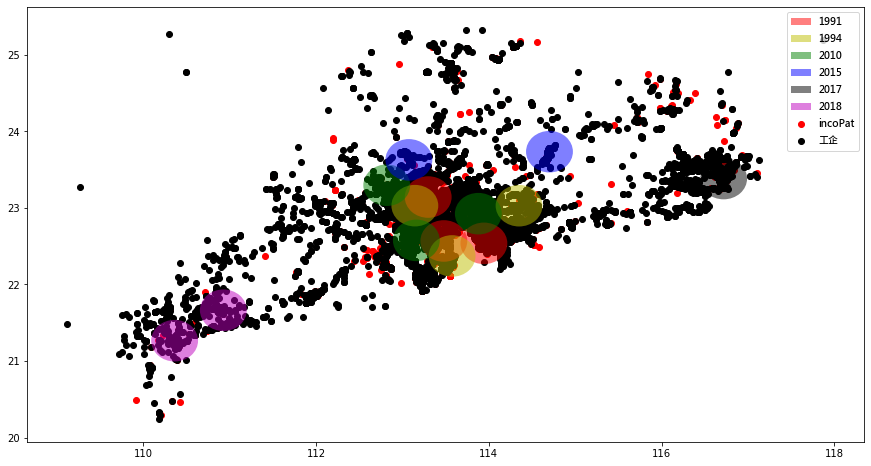

In [101]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax.scatter(patented['lnt'], patented['lat'],c='r',label='incoPat')
ax.scatter(not_patented['lnt'], not_patented['lat'],c='k',label='工企')
cir1 = Circle(xy = (113.29806, 23.14155), radius=30/110.574,facecolor='r' ,alpha=0.5,label='1991')
cir2 = Circle(xy = (113.94318, 22.53691), radius=30/110.574,facecolor='r' ,alpha=0.5)
cir3 = Circle(xy = (113.47901, 22.56769), radius=30/110.574,facecolor='r' ,alpha=0.5)
cir4 = Circle(xy = (113.14344, 23.02895), radius=30/110.574,facecolor='y' ,alpha=0.5,label='1994')
cir5 = Circle(xy = (114.35032, 23.02831), radius=30/110.574,facecolor='y' ,alpha=0.5)
cir6 = Circle(xy = (113.57486, 22.37209), radius=30/110.574,facecolor='y' ,alpha=0.5)
cir7 = Circle(xy = (113.87836, 22.92419), radius=30/110.574,facecolor='g' ,alpha=0.5,label='2010')
cir8 = Circle(xy = (112.81793, 23.29584), radius=30/110.574,facecolor='g' ,alpha=0.5)
cir9 = Circle(xy = (113.16077, 22.57522), radius=30/110.574,facecolor='g' ,alpha=0.5)
cir10 = Circle(xy = (114.70251, 23.73396), radius=30/110.574,facecolor='b' ,alpha=0.5,label='2015')
cir11 = Circle(xy = (113.07427, 23.62691), radius=30/110.574,facecolor='b' ,alpha=0.5)
cir12 = Circle(xy = (116.71951, 23.38275), radius=30/110.574,facecolor='k' ,alpha=0.5,label='2017')
cir13 = Circle(xy = (110.36128, 21.26543), radius=30/110.574,facecolor='m' ,alpha=0.5,label='2018')
cir14 = Circle(xy = (110.92543, 21.66299), radius=30/110.574,facecolor='m' ,alpha=0.5)

ax.add_patch(cir1)
ax.add_patch(cir2)
ax.add_patch(cir3)
ax.add_patch(cir4)
ax.add_patch(cir5)
ax.add_patch(cir6)
ax.add_patch(cir7)
ax.add_patch(cir8)
ax.add_patch(cir9)
ax.add_patch(cir10)
ax.add_patch(cir11)
ax.add_patch(cir12)
ax.add_patch(cir13)
ax.add_patch(cir14)

ax.legend(loc=1,prop=myfont)

In [102]:
merge_df_clean_2['廣州'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-113.29806)**2)+((x['lat']-23.14155)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['深圳'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-113.94318)**2)+((x['lat']-22.53691)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['中山火炬'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-113.47901)**2)+((x['lat']-22.56769)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['佛山'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-113.14344)**2)+((x['lat']-23.02895)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['惠州仲愷'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-114.35032)**2)+((x['lat']-23.02831)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['珠海'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-113.57486)**2)+((x['lat']-22.37209)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['東菀松山湖'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-113.87836)**2)+((x['lat']-22.92419)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['肇慶'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-112.81793)**2)+((x['lat']-23.29584)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['江門'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-113.16077)**2)+((x['lat']-22.57522)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['源城'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-114.70251)**2)+((x['lat']-23.73396)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['清遠'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-113.07427)**2)+((x['lat']-23.62691)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['汕頭'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-116.71951)**2)+((x['lat']-23.38275)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['湛江'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-110.36128)**2)+((x['lat']-21.26543)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['茂名'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-110.92543)**2)+((x['lat']-21.66299)**2))**0.5)<(30/110.574) else 0,axis=1)

In [103]:
patented = merge_df_clean_2[merge_df_clean_2['申请人']!='']
not_patented = merge_df_clean_2[merge_df_clean_2['申请人']=='']

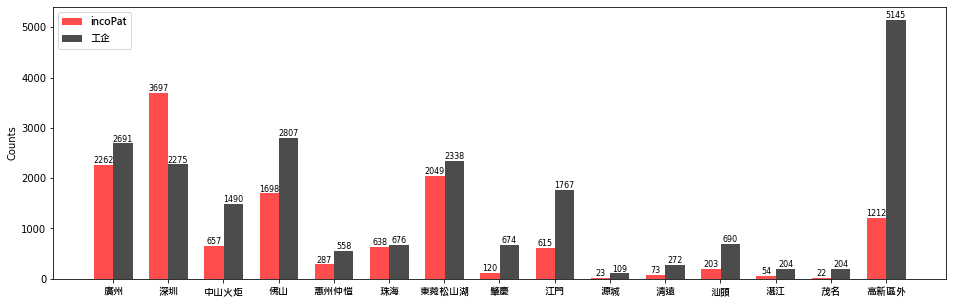

In [109]:
fig = plt.figure(figsize = (16,5))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Counts')
bar1 = ax1.bar(np.arange(0,15),[len(patented[patented['廣州']==1]),len(patented[patented['深圳']==1]),len(patented[patented['中山火炬']==1]),len(patented[patented['佛山']==1]),len(patented[patented['惠州仲愷']==1]),len(patented[patented['珠海']==1]),len(patented[patented['東菀松山湖']==1]),len(patented[patented['肇慶']==1]),len(patented[patented['江門']==1]),len(patented[patented['源城']==1]),len(patented[patented['清遠']==1]),len(patented[patented['汕頭']==1]),len(patented[patented['湛江']==1]),len(patented[patented['茂名']==1])
                                ,len(patented[(patented['廣州']==0)&(patented['深圳']==0)&(patented['中山火炬']==0)&(patented['佛山']==0)&(patented['惠州仲愷']==0)&(patented['珠海']==0)&(patented['東菀松山湖']==0)&(patented['肇慶']==0)&(patented['江門']==0)&(patented['源城']==0)&(patented['清遠']==0)&(patented['汕頭']==0)&(patented['湛江']==0)&(patented['茂名']==0)])]
               ,alpha=0.7,width=0.35,color='r',label='incoPat')
bar2 = ax1.bar(np.arange(0,15)+0.35,[len(not_patented[not_patented['廣州']==1]),len(not_patented[not_patented['深圳']==1]),len(not_patented[not_patented['中山火炬']==1]),len(not_patented[not_patented['佛山']==1]),len(not_patented[not_patented['惠州仲愷']==1]),len(not_patented[not_patented['珠海']==1]),len(not_patented[not_patented['東菀松山湖']==1]),len(not_patented[not_patented['肇慶']==1]),len(not_patented[not_patented['江門']==1]),len(not_patented[not_patented['源城']==1]),len(not_patented[not_patented['清遠']==1]),len(not_patented[not_patented['汕頭']==1]),len(not_patented[not_patented['湛江']==1]),len(not_patented[not_patented['茂名']==1])
                                ,len(not_patented[(not_patented['廣州']==0)&(not_patented['深圳']==0)&(not_patented['中山火炬']==0)&(not_patented['佛山']==0)&(not_patented['惠州仲愷']==0)&(not_patented['珠海']==0)&(not_patented['東菀松山湖']==0)&(not_patented['肇慶']==0)&(not_patented['江門']==0)&(not_patented['源城']==0)&(not_patented['清遠']==0)&(not_patented['汕頭']==0)&(not_patented['湛江']==0)&(not_patented['茂名']==0)])]
               ,alpha=0.7,width=0.35,color='k',label='工企')
for a,b in zip(np.arange(0,15),[len(patented[patented['廣州']==1]),len(patented[patented['深圳']==1]),len(patented[patented['中山火炬']==1]),len(patented[patented['佛山']==1]),len(patented[patented['惠州仲愷']==1]),len(patented[patented['珠海']==1]),len(patented[patented['東菀松山湖']==1]),len(patented[patented['肇慶']==1]),len(patented[patented['江門']==1]),len(patented[patented['源城']==1]),len(patented[patented['清遠']==1]),len(patented[patented['汕頭']==1]),len(patented[patented['湛江']==1]),len(patented[patented['茂名']==1])
                                ,len(patented[(patented['廣州']==0)&(patented['深圳']==0)&(patented['中山火炬']==0)&(patented['佛山']==0)&(patented['惠州仲愷']==0)&(patented['珠海']==0)&(patented['東菀松山湖']==0)&(patented['肇慶']==0)&(patented['江門']==0)&(patented['源城']==0)&(patented['清遠']==0)&(patented['汕頭']==0)&(patented['湛江']==0)&(patented['茂名']==0)])]):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=8)  
for a,b in zip(np.arange(0,15)+0.35,[len(not_patented[not_patented['廣州']==1]),len(not_patented[not_patented['深圳']==1]),len(not_patented[not_patented['中山火炬']==1]),len(not_patented[not_patented['佛山']==1]),len(not_patented[not_patented['惠州仲愷']==1]),len(not_patented[not_patented['珠海']==1]),len(not_patented[not_patented['東菀松山湖']==1]),len(not_patented[not_patented['肇慶']==1]),len(not_patented[not_patented['江門']==1]),len(not_patented[not_patented['源城']==1]),len(not_patented[not_patented['清遠']==1]),len(not_patented[not_patented['汕頭']==1]),len(not_patented[not_patented['湛江']==1]),len(not_patented[not_patented['茂名']==1])
                                ,len(not_patented[(not_patented['廣州']==0)&(not_patented['深圳']==0)&(not_patented['中山火炬']==0)&(not_patented['佛山']==0)&(not_patented['惠州仲愷']==0)&(not_patented['珠海']==0)&(not_patented['東菀松山湖']==0)&(not_patented['肇慶']==0)&(not_patented['江門']==0)&(not_patented['源城']==0)&(not_patented['清遠']==0)&(not_patented['汕頭']==0)&(not_patented['湛江']==0)&(not_patented['茂名']==0)])]):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=8) 

plt.xticks([0.17,1.17,2.17,3.17,4.17,5.17,6.17,7.17,8.17,9.17,10.17,11.17,12.17,13.17,14.17],['廣州','深圳','中山火炬','佛山','惠州仲愷','珠海','東菀松山湖','肇慶','江門','源城','清遠','汕頭','湛江','茂名','高新區外'],fontproperties=myfont)
plt.legend(handles = [bar1,bar2], loc='upper left',prop=myfont)

## 完整地址+沒模糊比對

In [110]:
merge_df_clean_2 = merge_df_clean[merge_df_clean['lat']!='']
#完整地址
merge_df_clean_2 = merge_df_clean_2[merge_df_clean_2['完整地址']==1]
merge_df_clean_2 = merge_df_clean_2[((20<merge_df_clean_2['lat'])&(merge_df_clean_2['lat']<26))&((109<merge_df_clean_2['lnt'])&(merge_df_clean_2['lnt']<118))]
patented = merge_df_clean_2[merge_df_clean_2['申请人']!='']
not_patented = merge_df_clean_2[merge_df_clean_2['申请人']=='']

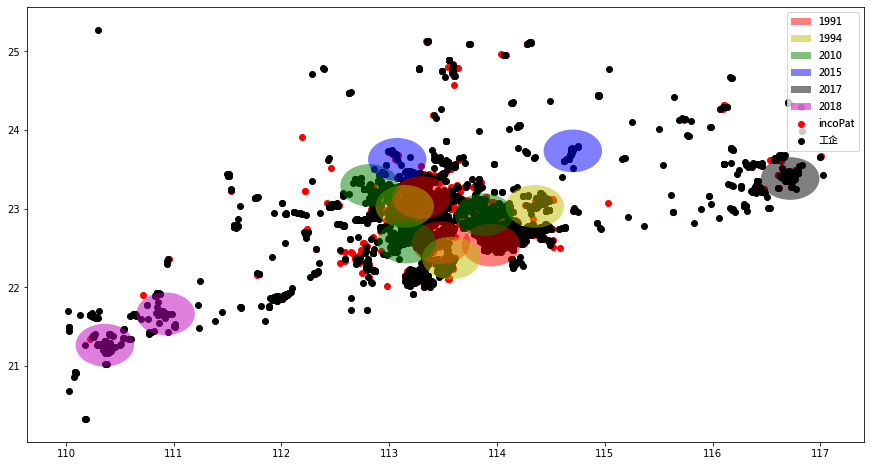

In [111]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax.scatter(patented['lnt'], patented['lat'],c='r',label='incoPat')
ax.scatter(not_patented['lnt'], not_patented['lat'],c='k',label='工企')
cir1 = Circle(xy = (113.29806, 23.14155), radius=30/110.574,facecolor='r' ,alpha=0.5,label='1991')
cir2 = Circle(xy = (113.94318, 22.53691), radius=30/110.574,facecolor='r' ,alpha=0.5)
cir3 = Circle(xy = (113.47901, 22.56769), radius=30/110.574,facecolor='r' ,alpha=0.5)
cir4 = Circle(xy = (113.14344, 23.02895), radius=30/110.574,facecolor='y' ,alpha=0.5,label='1994')
cir5 = Circle(xy = (114.35032, 23.02831), radius=30/110.574,facecolor='y' ,alpha=0.5)
cir6 = Circle(xy = (113.57486, 22.37209), radius=30/110.574,facecolor='y' ,alpha=0.5)
cir7 = Circle(xy = (113.87836, 22.92419), radius=30/110.574,facecolor='g' ,alpha=0.5,label='2010')
cir8 = Circle(xy = (112.81793, 23.29584), radius=30/110.574,facecolor='g' ,alpha=0.5)
cir9 = Circle(xy = (113.16077, 22.57522), radius=30/110.574,facecolor='g' ,alpha=0.5)
cir10 = Circle(xy = (114.70251, 23.73396), radius=30/110.574,facecolor='b' ,alpha=0.5,label='2015')
cir11 = Circle(xy = (113.07427, 23.62691), radius=30/110.574,facecolor='b' ,alpha=0.5)
cir12 = Circle(xy = (116.71951, 23.38275), radius=30/110.574,facecolor='k' ,alpha=0.5,label='2017')
cir13 = Circle(xy = (110.36128, 21.26543), radius=30/110.574,facecolor='m' ,alpha=0.5,label='2018')
cir14 = Circle(xy = (110.92543, 21.66299), radius=30/110.574,facecolor='m' ,alpha=0.5)

ax.add_patch(cir1)
ax.add_patch(cir2)
ax.add_patch(cir3)
ax.add_patch(cir4)
ax.add_patch(cir5)
ax.add_patch(cir6)
ax.add_patch(cir7)
ax.add_patch(cir8)
ax.add_patch(cir9)
ax.add_patch(cir10)
ax.add_patch(cir11)
ax.add_patch(cir12)
ax.add_patch(cir13)
ax.add_patch(cir14)

ax.legend(loc=1,prop=myfont)

In [112]:
merge_df_clean_2['廣州'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-113.29806)**2)+((x['lat']-23.14155)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['深圳'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-113.94318)**2)+((x['lat']-22.53691)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['中山火炬'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-113.47901)**2)+((x['lat']-22.56769)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['佛山'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-113.14344)**2)+((x['lat']-23.02895)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['惠州仲愷'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-114.35032)**2)+((x['lat']-23.02831)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['珠海'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-113.57486)**2)+((x['lat']-22.37209)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['東菀松山湖'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-113.87836)**2)+((x['lat']-22.92419)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['肇慶'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-112.81793)**2)+((x['lat']-23.29584)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['江門'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-113.16077)**2)+((x['lat']-22.57522)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['源城'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-114.70251)**2)+((x['lat']-23.73396)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['清遠'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-113.07427)**2)+((x['lat']-23.62691)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['汕頭'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-116.71951)**2)+((x['lat']-23.38275)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['湛江'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-110.36128)**2)+((x['lat']-21.26543)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['茂名'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-110.92543)**2)+((x['lat']-21.66299)**2))**0.5)<(30/110.574) else 0,axis=1)
patented = merge_df_clean_2[merge_df_clean_2['申请人']!='']
not_patented = merge_df_clean_2[merge_df_clean_2['申请人']=='']

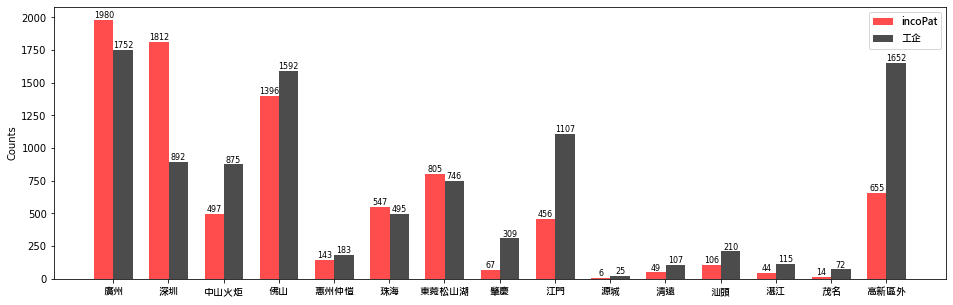

In [114]:
fig = plt.figure(figsize = (16,5))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Counts')
bar1 = ax1.bar(np.arange(0,15),[len(patented[patented['廣州']==1]),len(patented[patented['深圳']==1]),len(patented[patented['中山火炬']==1]),len(patented[patented['佛山']==1]),len(patented[patented['惠州仲愷']==1]),len(patented[patented['珠海']==1]),len(patented[patented['東菀松山湖']==1]),len(patented[patented['肇慶']==1]),len(patented[patented['江門']==1]),len(patented[patented['源城']==1]),len(patented[patented['清遠']==1]),len(patented[patented['汕頭']==1]),len(patented[patented['湛江']==1]),len(patented[patented['茂名']==1])
                                ,len(patented[(patented['廣州']==0)&(patented['深圳']==0)&(patented['中山火炬']==0)&(patented['佛山']==0)&(patented['惠州仲愷']==0)&(patented['珠海']==0)&(patented['東菀松山湖']==0)&(patented['肇慶']==0)&(patented['江門']==0)&(patented['源城']==0)&(patented['清遠']==0)&(patented['汕頭']==0)&(patented['湛江']==0)&(patented['茂名']==0)])]
               ,alpha=0.7,width=0.35,color='r',label='incoPat')
bar2 = ax1.bar(np.arange(0,15)+0.35,[len(not_patented[not_patented['廣州']==1]),len(not_patented[not_patented['深圳']==1]),len(not_patented[not_patented['中山火炬']==1]),len(not_patented[not_patented['佛山']==1]),len(not_patented[not_patented['惠州仲愷']==1]),len(not_patented[not_patented['珠海']==1]),len(not_patented[not_patented['東菀松山湖']==1]),len(not_patented[not_patented['肇慶']==1]),len(not_patented[not_patented['江門']==1]),len(not_patented[not_patented['源城']==1]),len(not_patented[not_patented['清遠']==1]),len(not_patented[not_patented['汕頭']==1]),len(not_patented[not_patented['湛江']==1]),len(not_patented[not_patented['茂名']==1])
                                ,len(not_patented[(not_patented['廣州']==0)&(not_patented['深圳']==0)&(not_patented['中山火炬']==0)&(not_patented['佛山']==0)&(not_patented['惠州仲愷']==0)&(not_patented['珠海']==0)&(not_patented['東菀松山湖']==0)&(not_patented['肇慶']==0)&(not_patented['江門']==0)&(not_patented['源城']==0)&(not_patented['清遠']==0)&(not_patented['汕頭']==0)&(not_patented['湛江']==0)&(not_patented['茂名']==0)])]
               ,alpha=0.7,width=0.35,color='k',label='工企')
for a,b in zip(np.arange(0,15),[len(patented[patented['廣州']==1]),len(patented[patented['深圳']==1]),len(patented[patented['中山火炬']==1]),len(patented[patented['佛山']==1]),len(patented[patented['惠州仲愷']==1]),len(patented[patented['珠海']==1]),len(patented[patented['東菀松山湖']==1]),len(patented[patented['肇慶']==1]),len(patented[patented['江門']==1]),len(patented[patented['源城']==1]),len(patented[patented['清遠']==1]),len(patented[patented['汕頭']==1]),len(patented[patented['湛江']==1]),len(patented[patented['茂名']==1])
                                ,len(patented[(patented['廣州']==0)&(patented['深圳']==0)&(patented['中山火炬']==0)&(patented['佛山']==0)&(patented['惠州仲愷']==0)&(patented['珠海']==0)&(patented['東菀松山湖']==0)&(patented['肇慶']==0)&(patented['江門']==0)&(patented['源城']==0)&(patented['清遠']==0)&(patented['汕頭']==0)&(patented['湛江']==0)&(patented['茂名']==0)])]):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=8)  
for a,b in zip(np.arange(0,15)+0.35,[len(not_patented[not_patented['廣州']==1]),len(not_patented[not_patented['深圳']==1]),len(not_patented[not_patented['中山火炬']==1]),len(not_patented[not_patented['佛山']==1]),len(not_patented[not_patented['惠州仲愷']==1]),len(not_patented[not_patented['珠海']==1]),len(not_patented[not_patented['東菀松山湖']==1]),len(not_patented[not_patented['肇慶']==1]),len(not_patented[not_patented['江門']==1]),len(not_patented[not_patented['源城']==1]),len(not_patented[not_patented['清遠']==1]),len(not_patented[not_patented['汕頭']==1]),len(not_patented[not_patented['湛江']==1]),len(not_patented[not_patented['茂名']==1])
                                ,len(not_patented[(not_patented['廣州']==0)&(not_patented['深圳']==0)&(not_patented['中山火炬']==0)&(not_patented['佛山']==0)&(not_patented['惠州仲愷']==0)&(not_patented['珠海']==0)&(not_patented['東菀松山湖']==0)&(not_patented['肇慶']==0)&(not_patented['江門']==0)&(not_patented['源城']==0)&(not_patented['清遠']==0)&(not_patented['汕頭']==0)&(not_patented['湛江']==0)&(not_patented['茂名']==0)])]):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=8) 

plt.xticks([0.17,1.17,2.17,3.17,4.17,5.17,6.17,7.17,8.17,9.17,10.17,11.17,12.17,13.17,14.17],['廣州','深圳','中山火炬','佛山','惠州仲愷','珠海','東菀松山湖','肇慶','江門','源城','清遠','汕頭','湛江','茂名','高新區外'],fontproperties=myfont)
plt.legend(handles = [bar1,bar2], loc='upper right',prop=myfont)

## 寬鬆地址+模糊比對

In [156]:
merge_df_clean_2 =merge_df_fuzzy_clean[merge_df_fuzzy_clean['lat']!='']
merge_df_clean_2 = merge_df_clean_2[((20<merge_df_clean_2['lat'])&(merge_df_clean_2['lat']<26))&((109<merge_df_clean_2['lnt'])&(merge_df_clean_2['lnt']<118))]
patented = merge_df_clean_2[merge_df_clean_2['申请人']!='']
not_patented = merge_df_clean_2[merge_df_clean_2['申请人']=='']

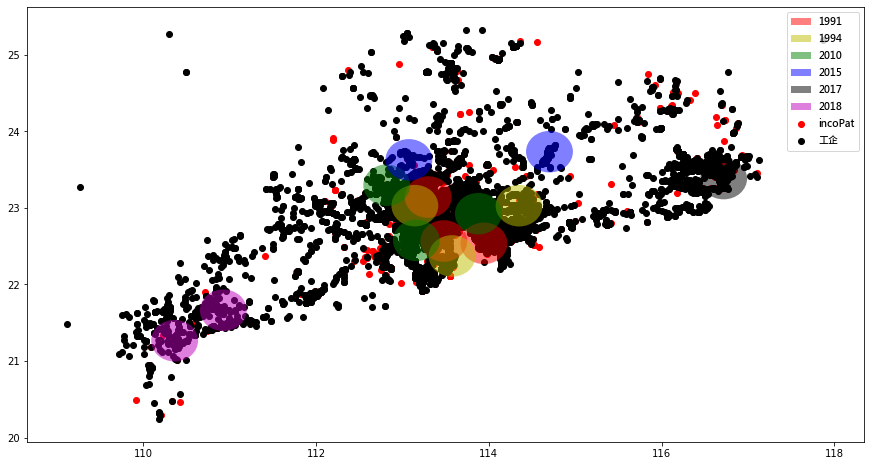

In [157]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax.scatter(patented['lnt'], patented['lat'],c='r',label='incoPat')
ax.scatter(not_patented['lnt'], not_patented['lat'],c='k',label='工企')
cir1 = Circle(xy = (113.29806, 23.14155), radius=30/110.574,facecolor='r' ,alpha=0.5,label='1991')
cir2 = Circle(xy = (113.94318, 22.53691), radius=30/110.574,facecolor='r' ,alpha=0.5)
cir3 = Circle(xy = (113.47901, 22.56769), radius=30/110.574,facecolor='r' ,alpha=0.5)
cir4 = Circle(xy = (113.14344, 23.02895), radius=30/110.574,facecolor='y' ,alpha=0.5,label='1994')
cir5 = Circle(xy = (114.35032, 23.02831), radius=30/110.574,facecolor='y' ,alpha=0.5)
cir6 = Circle(xy = (113.57486, 22.37209), radius=30/110.574,facecolor='y' ,alpha=0.5)
cir7 = Circle(xy = (113.87836, 22.92419), radius=30/110.574,facecolor='g' ,alpha=0.5,label='2010')
cir8 = Circle(xy = (112.81793, 23.29584), radius=30/110.574,facecolor='g' ,alpha=0.5)
cir9 = Circle(xy = (113.16077, 22.57522), radius=30/110.574,facecolor='g' ,alpha=0.5)
cir10 = Circle(xy = (114.70251, 23.73396), radius=30/110.574,facecolor='b' ,alpha=0.5,label='2015')
cir11 = Circle(xy = (113.07427, 23.62691), radius=30/110.574,facecolor='b' ,alpha=0.5)
cir12 = Circle(xy = (116.71951, 23.38275), radius=30/110.574,facecolor='k' ,alpha=0.5,label='2017')
cir13 = Circle(xy = (110.36128, 21.26543), radius=30/110.574,facecolor='m' ,alpha=0.5,label='2018')
cir14 = Circle(xy = (110.92543, 21.66299), radius=30/110.574,facecolor='m' ,alpha=0.5)

ax.add_patch(cir1)
ax.add_patch(cir2)
ax.add_patch(cir3)
ax.add_patch(cir4)
ax.add_patch(cir5)
ax.add_patch(cir6)
ax.add_patch(cir7)
ax.add_patch(cir8)
ax.add_patch(cir9)
ax.add_patch(cir10)
ax.add_patch(cir11)
ax.add_patch(cir12)
ax.add_patch(cir13)
ax.add_patch(cir14)

ax.legend(loc=1,prop=myfont)

In [158]:
merge_df_clean_2['廣州'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-113.29806)**2)+((x['lat']-23.14155)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['深圳'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-113.94318)**2)+((x['lat']-22.53691)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['中山火炬'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-113.47901)**2)+((x['lat']-22.56769)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['佛山'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-113.14344)**2)+((x['lat']-23.02895)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['惠州仲愷'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-114.35032)**2)+((x['lat']-23.02831)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['珠海'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-113.57486)**2)+((x['lat']-22.37209)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['東菀松山湖'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-113.87836)**2)+((x['lat']-22.92419)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['肇慶'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-112.81793)**2)+((x['lat']-23.29584)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['江門'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-113.16077)**2)+((x['lat']-22.57522)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['源城'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-114.70251)**2)+((x['lat']-23.73396)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['清遠'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-113.07427)**2)+((x['lat']-23.62691)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['汕頭'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-116.71951)**2)+((x['lat']-23.38275)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['湛江'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-110.36128)**2)+((x['lat']-21.26543)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['茂名'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-110.92543)**2)+((x['lat']-21.66299)**2))**0.5)<(30/110.574) else 0,axis=1)
patented = merge_df_clean_2[merge_df_clean_2['申请人']!='']
not_patented = merge_df_clean_2[merge_df_clean_2['申请人']=='']

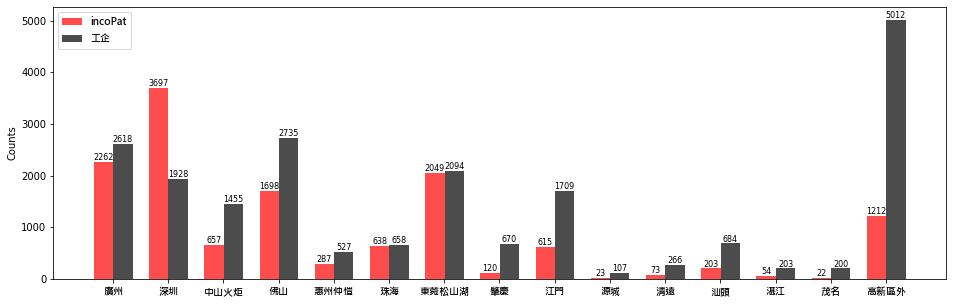

In [159]:
fig = plt.figure(figsize = (16,5))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Counts')
bar1 = ax1.bar(np.arange(0,15),[len(patented[patented['廣州']==1]),len(patented[patented['深圳']==1]),len(patented[patented['中山火炬']==1]),len(patented[patented['佛山']==1]),len(patented[patented['惠州仲愷']==1]),len(patented[patented['珠海']==1]),len(patented[patented['東菀松山湖']==1]),len(patented[patented['肇慶']==1]),len(patented[patented['江門']==1]),len(patented[patented['源城']==1]),len(patented[patented['清遠']==1]),len(patented[patented['汕頭']==1]),len(patented[patented['湛江']==1]),len(patented[patented['茂名']==1])
                                ,len(patented[(patented['廣州']==0)&(patented['深圳']==0)&(patented['中山火炬']==0)&(patented['佛山']==0)&(patented['惠州仲愷']==0)&(patented['珠海']==0)&(patented['東菀松山湖']==0)&(patented['肇慶']==0)&(patented['江門']==0)&(patented['源城']==0)&(patented['清遠']==0)&(patented['汕頭']==0)&(patented['湛江']==0)&(patented['茂名']==0)])]
               ,alpha=0.7,width=0.35,color='r',label='incoPat')
bar2 = ax1.bar(np.arange(0,15)+0.35,[len(not_patented[not_patented['廣州']==1]),len(not_patented[not_patented['深圳']==1]),len(not_patented[not_patented['中山火炬']==1]),len(not_patented[not_patented['佛山']==1]),len(not_patented[not_patented['惠州仲愷']==1]),len(not_patented[not_patented['珠海']==1]),len(not_patented[not_patented['東菀松山湖']==1]),len(not_patented[not_patented['肇慶']==1]),len(not_patented[not_patented['江門']==1]),len(not_patented[not_patented['源城']==1]),len(not_patented[not_patented['清遠']==1]),len(not_patented[not_patented['汕頭']==1]),len(not_patented[not_patented['湛江']==1]),len(not_patented[not_patented['茂名']==1])
                                ,len(not_patented[(not_patented['廣州']==0)&(not_patented['深圳']==0)&(not_patented['中山火炬']==0)&(not_patented['佛山']==0)&(not_patented['惠州仲愷']==0)&(not_patented['珠海']==0)&(not_patented['東菀松山湖']==0)&(not_patented['肇慶']==0)&(not_patented['江門']==0)&(not_patented['源城']==0)&(not_patented['清遠']==0)&(not_patented['汕頭']==0)&(not_patented['湛江']==0)&(not_patented['茂名']==0)])]
               ,alpha=0.7,width=0.35,color='k',label='工企')
for a,b in zip(np.arange(0,15),[len(patented[patented['廣州']==1]),len(patented[patented['深圳']==1]),len(patented[patented['中山火炬']==1]),len(patented[patented['佛山']==1]),len(patented[patented['惠州仲愷']==1]),len(patented[patented['珠海']==1]),len(patented[patented['東菀松山湖']==1]),len(patented[patented['肇慶']==1]),len(patented[patented['江門']==1]),len(patented[patented['源城']==1]),len(patented[patented['清遠']==1]),len(patented[patented['汕頭']==1]),len(patented[patented['湛江']==1]),len(patented[patented['茂名']==1])
                                ,len(patented[(patented['廣州']==0)&(patented['深圳']==0)&(patented['中山火炬']==0)&(patented['佛山']==0)&(patented['惠州仲愷']==0)&(patented['珠海']==0)&(patented['東菀松山湖']==0)&(patented['肇慶']==0)&(patented['江門']==0)&(patented['源城']==0)&(patented['清遠']==0)&(patented['汕頭']==0)&(patented['湛江']==0)&(patented['茂名']==0)])]):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=8)  
for a,b in zip(np.arange(0,15)+0.35,[len(not_patented[not_patented['廣州']==1]),len(not_patented[not_patented['深圳']==1]),len(not_patented[not_patented['中山火炬']==1]),len(not_patented[not_patented['佛山']==1]),len(not_patented[not_patented['惠州仲愷']==1]),len(not_patented[not_patented['珠海']==1]),len(not_patented[not_patented['東菀松山湖']==1]),len(not_patented[not_patented['肇慶']==1]),len(not_patented[not_patented['江門']==1]),len(not_patented[not_patented['源城']==1]),len(not_patented[not_patented['清遠']==1]),len(not_patented[not_patented['汕頭']==1]),len(not_patented[not_patented['湛江']==1]),len(not_patented[not_patented['茂名']==1])
                                ,len(not_patented[(not_patented['廣州']==0)&(not_patented['深圳']==0)&(not_patented['中山火炬']==0)&(not_patented['佛山']==0)&(not_patented['惠州仲愷']==0)&(not_patented['珠海']==0)&(not_patented['東菀松山湖']==0)&(not_patented['肇慶']==0)&(not_patented['江門']==0)&(not_patented['源城']==0)&(not_patented['清遠']==0)&(not_patented['汕頭']==0)&(not_patented['湛江']==0)&(not_patented['茂名']==0)])]):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=8) 

plt.xticks([0.17,1.17,2.17,3.17,4.17,5.17,6.17,7.17,8.17,9.17,10.17,11.17,12.17,13.17,14.17],['廣州','深圳','中山火炬','佛山','惠州仲愷','珠海','東菀松山湖','肇慶','江門','源城','清遠','汕頭','湛江','茂名','高新區外'],fontproperties=myfont)
plt.legend(handles = [bar1,bar2], loc='upper left',prop=myfont)

## 完整地址+模糊比對

In [160]:
merge_df_clean_2 =merge_df_fuzzy_clean[merge_df_fuzzy_clean['lat']!='']
#完整地址
merge_df_clean_2 = merge_df_clean_2[merge_df_clean_2['完整地址']==1]
merge_df_clean_2 = merge_df_clean_2[((20<merge_df_clean_2['lat'])&(merge_df_clean_2['lat']<26))&((109<merge_df_clean_2['lnt'])&(merge_df_clean_2['lnt']<118))]
patented = merge_df_clean_2[merge_df_clean_2['申请人']!='']
not_patented = merge_df_clean_2[merge_df_clean_2['申请人']=='']

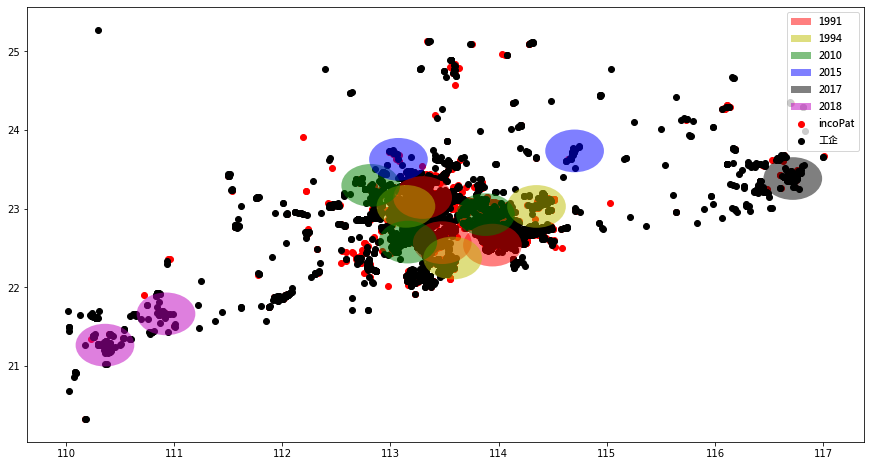

In [161]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax.scatter(patented['lnt'], patented['lat'],c='r',label='incoPat')
ax.scatter(not_patented['lnt'], not_patented['lat'],c='k',label='工企')
cir1 = Circle(xy = (113.29806, 23.14155), radius=30/110.574,facecolor='r' ,alpha=0.5,label='1991')
cir2 = Circle(xy = (113.94318, 22.53691), radius=30/110.574,facecolor='r' ,alpha=0.5)
cir3 = Circle(xy = (113.47901, 22.56769), radius=30/110.574,facecolor='r' ,alpha=0.5)
cir4 = Circle(xy = (113.14344, 23.02895), radius=30/110.574,facecolor='y' ,alpha=0.5,label='1994')
cir5 = Circle(xy = (114.35032, 23.02831), radius=30/110.574,facecolor='y' ,alpha=0.5)
cir6 = Circle(xy = (113.57486, 22.37209), radius=30/110.574,facecolor='y' ,alpha=0.5)
cir7 = Circle(xy = (113.87836, 22.92419), radius=30/110.574,facecolor='g' ,alpha=0.5,label='2010')
cir8 = Circle(xy = (112.81793, 23.29584), radius=30/110.574,facecolor='g' ,alpha=0.5)
cir9 = Circle(xy = (113.16077, 22.57522), radius=30/110.574,facecolor='g' ,alpha=0.5)
cir10 = Circle(xy = (114.70251, 23.73396), radius=30/110.574,facecolor='b' ,alpha=0.5,label='2015')
cir11 = Circle(xy = (113.07427, 23.62691), radius=30/110.574,facecolor='b' ,alpha=0.5)
cir12 = Circle(xy = (116.71951, 23.38275), radius=30/110.574,facecolor='k' ,alpha=0.5,label='2017')
cir13 = Circle(xy = (110.36128, 21.26543), radius=30/110.574,facecolor='m' ,alpha=0.5,label='2018')
cir14 = Circle(xy = (110.92543, 21.66299), radius=30/110.574,facecolor='m' ,alpha=0.5)

ax.add_patch(cir1)
ax.add_patch(cir2)
ax.add_patch(cir3)
ax.add_patch(cir4)
ax.add_patch(cir5)
ax.add_patch(cir6)
ax.add_patch(cir7)
ax.add_patch(cir8)
ax.add_patch(cir9)
ax.add_patch(cir10)
ax.add_patch(cir11)
ax.add_patch(cir12)
ax.add_patch(cir13)
ax.add_patch(cir14)

ax.legend(loc=1,prop=myfont)

In [162]:
merge_df_clean_2['廣州'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-113.29806)**2)+((x['lat']-23.14155)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['深圳'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-113.94318)**2)+((x['lat']-22.53691)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['中山火炬'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-113.47901)**2)+((x['lat']-22.56769)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['佛山'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-113.14344)**2)+((x['lat']-23.02895)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['惠州仲愷'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-114.35032)**2)+((x['lat']-23.02831)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['珠海'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-113.57486)**2)+((x['lat']-22.37209)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['東菀松山湖'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-113.87836)**2)+((x['lat']-22.92419)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['肇慶'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-112.81793)**2)+((x['lat']-23.29584)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['江門'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-113.16077)**2)+((x['lat']-22.57522)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['源城'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-114.70251)**2)+((x['lat']-23.73396)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['清遠'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-113.07427)**2)+((x['lat']-23.62691)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['汕頭'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-116.71951)**2)+((x['lat']-23.38275)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['湛江'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-110.36128)**2)+((x['lat']-21.26543)**2))**0.5)<(30/110.574) else 0,axis=1)
merge_df_clean_2['茂名'] = merge_df_clean_2.apply(lambda x:1 if ((((x['lnt']-110.92543)**2)+((x['lat']-21.66299)**2))**0.5)<(30/110.574) else 0,axis=1)
patented = merge_df_clean_2[merge_df_clean_2['申请人']!='']
not_patented = merge_df_clean_2[merge_df_clean_2['申请人']=='']

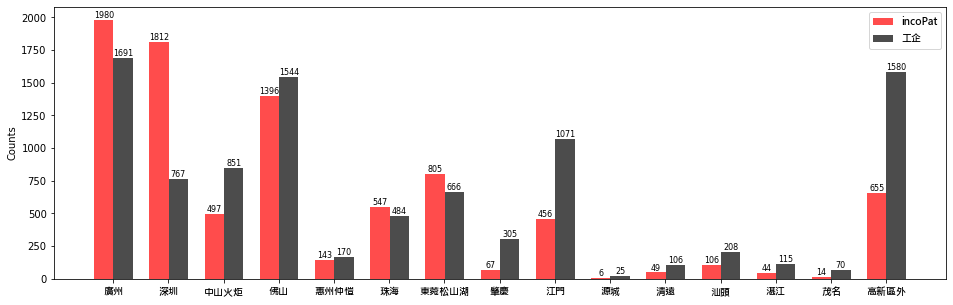

In [164]:
fig = plt.figure(figsize = (16,5))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Counts')
bar1 = ax1.bar(np.arange(0,15),[len(patented[patented['廣州']==1]),len(patented[patented['深圳']==1]),len(patented[patented['中山火炬']==1]),len(patented[patented['佛山']==1]),len(patented[patented['惠州仲愷']==1]),len(patented[patented['珠海']==1]),len(patented[patented['東菀松山湖']==1]),len(patented[patented['肇慶']==1]),len(patented[patented['江門']==1]),len(patented[patented['源城']==1]),len(patented[patented['清遠']==1]),len(patented[patented['汕頭']==1]),len(patented[patented['湛江']==1]),len(patented[patented['茂名']==1])
                                ,len(patented[(patented['廣州']==0)&(patented['深圳']==0)&(patented['中山火炬']==0)&(patented['佛山']==0)&(patented['惠州仲愷']==0)&(patented['珠海']==0)&(patented['東菀松山湖']==0)&(patented['肇慶']==0)&(patented['江門']==0)&(patented['源城']==0)&(patented['清遠']==0)&(patented['汕頭']==0)&(patented['湛江']==0)&(patented['茂名']==0)])]
               ,alpha=0.7,width=0.35,color='r',label='incoPat')
bar2 = ax1.bar(np.arange(0,15)+0.35,[len(not_patented[not_patented['廣州']==1]),len(not_patented[not_patented['深圳']==1]),len(not_patented[not_patented['中山火炬']==1]),len(not_patented[not_patented['佛山']==1]),len(not_patented[not_patented['惠州仲愷']==1]),len(not_patented[not_patented['珠海']==1]),len(not_patented[not_patented['東菀松山湖']==1]),len(not_patented[not_patented['肇慶']==1]),len(not_patented[not_patented['江門']==1]),len(not_patented[not_patented['源城']==1]),len(not_patented[not_patented['清遠']==1]),len(not_patented[not_patented['汕頭']==1]),len(not_patented[not_patented['湛江']==1]),len(not_patented[not_patented['茂名']==1])
                                ,len(not_patented[(not_patented['廣州']==0)&(not_patented['深圳']==0)&(not_patented['中山火炬']==0)&(not_patented['佛山']==0)&(not_patented['惠州仲愷']==0)&(not_patented['珠海']==0)&(not_patented['東菀松山湖']==0)&(not_patented['肇慶']==0)&(not_patented['江門']==0)&(not_patented['源城']==0)&(not_patented['清遠']==0)&(not_patented['汕頭']==0)&(not_patented['湛江']==0)&(not_patented['茂名']==0)])]
               ,alpha=0.7,width=0.35,color='k',label='工企')
for a,b in zip(np.arange(0,15),[len(patented[patented['廣州']==1]),len(patented[patented['深圳']==1]),len(patented[patented['中山火炬']==1]),len(patented[patented['佛山']==1]),len(patented[patented['惠州仲愷']==1]),len(patented[patented['珠海']==1]),len(patented[patented['東菀松山湖']==1]),len(patented[patented['肇慶']==1]),len(patented[patented['江門']==1]),len(patented[patented['源城']==1]),len(patented[patented['清遠']==1]),len(patented[patented['汕頭']==1]),len(patented[patented['湛江']==1]),len(patented[patented['茂名']==1])
                                ,len(patented[(patented['廣州']==0)&(patented['深圳']==0)&(patented['中山火炬']==0)&(patented['佛山']==0)&(patented['惠州仲愷']==0)&(patented['珠海']==0)&(patented['東菀松山湖']==0)&(patented['肇慶']==0)&(patented['江門']==0)&(patented['源城']==0)&(patented['清遠']==0)&(patented['汕頭']==0)&(patented['湛江']==0)&(patented['茂名']==0)])]):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=8)  
for a,b in zip(np.arange(0,15)+0.35,[len(not_patented[not_patented['廣州']==1]),len(not_patented[not_patented['深圳']==1]),len(not_patented[not_patented['中山火炬']==1]),len(not_patented[not_patented['佛山']==1]),len(not_patented[not_patented['惠州仲愷']==1]),len(not_patented[not_patented['珠海']==1]),len(not_patented[not_patented['東菀松山湖']==1]),len(not_patented[not_patented['肇慶']==1]),len(not_patented[not_patented['江門']==1]),len(not_patented[not_patented['源城']==1]),len(not_patented[not_patented['清遠']==1]),len(not_patented[not_patented['汕頭']==1]),len(not_patented[not_patented['湛江']==1]),len(not_patented[not_patented['茂名']==1])
                                ,len(not_patented[(not_patented['廣州']==0)&(not_patented['深圳']==0)&(not_patented['中山火炬']==0)&(not_patented['佛山']==0)&(not_patented['惠州仲愷']==0)&(not_patented['珠海']==0)&(not_patented['東菀松山湖']==0)&(not_patented['肇慶']==0)&(not_patented['江門']==0)&(not_patented['源城']==0)&(not_patented['清遠']==0)&(not_patented['汕頭']==0)&(not_patented['湛江']==0)&(not_patented['茂名']==0)])]):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=8) 

plt.xticks([0.17,1.17,2.17,3.17,4.17,5.17,6.17,7.17,8.17,9.17,10.17,11.17,12.17,13.17,14.17],['廣州','深圳','中山火炬','佛山','惠州仲愷','珠海','東菀松山湖','肇慶','江門','源城','清遠','汕頭','湛江','茂名','高新區外'],fontproperties=myfont)
plt.legend(handles = [bar1,bar2], loc='upper right',prop=myfont)